In [1]:
import pandas as pd 
import gensim
from gensim import corpora,models
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer #tokenizes and counts words
from sklearn.feature_extraction.text import TfidfVectorizer #alternatively, use TfidfTransformer()
from sklearn import metrics
import requests
from sklearn.feature_selection import RFE, chi2
from scipy.spatial import distance
from pandas.core.frame import DataFrame
from nltk import FreqDist
from sklearn.metrics.pairwise import cosine_similarity
from gensim.matutils import kullback_leibler, jaccard, hellinger, sparse2full
import string
from scipy.stats import entropy
from numpy.linalg import norm
from scipy.spatial import distance
import spacy
from collections import Counter

In [2]:
from spacy.lang.el import Greek

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)


Mounted at /content/drive


['Getting started.pdf',
 'image (1).jpg',
 'image.jpg',
 'C347414E-901F-4ADD-A460-3B99C03799B4.png',
 'Introduction to Scientific Programming and Simulation Using R.pdf',
 'RDataScience(1).pdf',
 'database group project.gdoc',
 'Database Data.gsheet',
 'Text Analytics Phase 1.gslides',
 '2018GMAT课件',
 'Untitled presentation (1).gslides',
 '9526f2636c319b9ed60bdc9c605f7725.mp4',
 'Camera Roll.zip',
 'WIN_20200323_11_22_38_Pro.mp4',
 'Untitled spreadsheet.gsheet',
 'Big Data Analytics Proposal.gslides',
 'Discover the correlation between Public transportation facilities investment and the frequency of Traffic accident in United States.gdoc',
 'Untitled presentation.gslides',
 'gmat.exe',
 'Web Analytics.zip',
 'Data Mining.zip',
 'datamodeler-19.2.0.182.1216-x64.zip',
 'Bootcamp 课件.zip',
 'Torrey (1911).pdf',
 'Torrey (1911).gdoc',
 'Bootcamp 课件 (1).zip',
 'Bible_Data.csv',
 'OtherApostlesWork_Data.csv',
 'Colab Notebooks',
 'drive',
 'Peter word_count.jpg',
 'John word_count.jpg',
 'Jud

In [4]:
!pip install sklearn

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM


from sklearn.datasets import fetch_20newsgroups

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from random import random
from numpy import array
from numpy import cumsum
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
max_features = 100  ## maximum pos tag types
seq_length = 20   ## normalize sequences length
batch_size = 32   ## number of training examples utilized in one iteration

In [7]:
df = pd.read_csv('na28withindex.csv', encoding = 'utf-16', sep = '\t')
df2 = pd.read_csv('sblwithindex.csv', encoding = 'utf-16', sep = '\t')
df3 = pd.read_csv('tyndalewithindex.csv', encoding = 'utf-16', sep = '\t')

## Build bidirectional LSTM model

In [8]:
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="relu")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         12800     
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 210,561
Trainable params: 210,561
Non-trainable params: 0
_________________________________________________________________


In [9]:
## transfer text to pos tag
def cosine_text(text):
    pos_tag = []
    for t in text['Verse_index']:
        pos_tag.append(t)
    for y in Heb['Verse_index']:
        pos_tag.append(y)
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(pos_tag)
    sequences_train = tokenizer.texts_to_sequences(pos_tag)
    word_index = tokenizer.word_index
    x_train = pad_sequences(sequences_train, maxlen=seq_length)
    return x_train

In [10]:
## create target variable
def text_author(text):
    author_tag = []
    for t in text['Author_index']:
        author_tag.append(t)
    for f in Heb['Author_index']:
        author_tag.append(f)
    my_array = np.array(author_tag)
    return my_array

In [11]:
## result measurement
def model_output(rnntext,rnntext2):

  X_train, X_test, y_train, y_test = train_test_split(rnntext, rnntext2, test_size = 0.2)
  model.compile("rmsprop", "binary_crossentropy", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
  return history

## NA28_version

In [ ]:
Matthew = df[df.BookName == 'Mt']
Matthew['Author'] = 'Matthew'
Mark = df[df.BookName == 'Mk']
Mark['Author'] = 'Mark'
Luke = df[df.BookName == 'Lk']
Luke['Author'] = 'Luke'
John = df[df.BookName == 'Joh']
John['Author'] = 'John'
Acts = df[df.BookName == 'Apg']
Acts['Author'] = 'Luke'
Luke_Book = pd.concat([Luke,Acts],axis = 0)
James = df[df.BookName == 'Jak']
James['Author'] = 'James'
f_Peter = df[df.BookName == '1.Petr']
s_Peter = df[df.BookName == '2.Petr']
f_Peter['Author'] = 'Peter'
s_Peter['Author'] = 'Peter'
Peter_letter = pd.concat([f_Peter, s_Peter], axis = 0)

f_John = df[df.BookName == '1.Joh']
s_John = df[df.BookName == '2.Joh']
t_John = df[df.BookName == '3.Joh']
f_John['Author'] = 'John'
s_John['Author'] = 'John'
t_John['Author'] = 'John'
John_letter = pd.concat([f_John, s_John, t_John], axis = 0)

Jude = df[df.BookName == 'Jud']
Jude['Author'] = 'Jude'
Rev = df[df.BookName == 'Offb']
Rev['Author'] = 'John'
John_Book = pd.concat([John,John_letter,Rev],axis = 0)

In [ ]:
Romans = df[df.BookName == 'Röm']
Romans['Author'] = 'Paul'
f_cor = df[df.BookName == '1.Kor']
f_cor['Author'] = 'Paul'
s_cor = df[df.BookName == '2.Kor']
s_cor['Author'] = 'Paul'
Gal = df[df.BookName == 'Gal']
Gal['Author'] = 'Paul'
Eph = df[df.BookName == 'Eph']
Eph['Author'] = 'Paul'
Phi = df[df.BookName == 'Phil']
Phi['Author'] = 'Paul'
Col = df[df.BookName == 'Kol']
Col['Author'] = 'Paul'
f_the = df[df.BookName == '1.Thess']
f_the['Author'] = 'Paul'
s_the = df[df.BookName == '2.Thess']
s_the['Author'] = 'Paul'
f_tim = df[df.BookName == '1.Tim']
f_tim['Author'] = 'Paul'
s_tim = df[df.BookName == '2.Tim']
s_tim['Author'] = 'Paul'
Titus = df[df.BookName == 'Tit']
Titus['Author'] = 'Paul'
Philemon = df[df.BookName == 'Phlm']
Philemon['Author'] = 'Paul'
Paul_letters = pd.concat([Romans,f_cor,s_cor,Gal,Eph,Phi,Col,f_the,s_the,f_tim,s_tim,Titus,Philemon],axis = 0)
Heb = df[df.BookName == 'heb']
Heb['Author'] = 'Paul?'

In [ ]:
g1 = cosine_text(Matthew)
g2 = cosine_text(Mark)
g3 = cosine_text(Luke)
g4 = cosine_text(John)
acts = cosine_text(Acts)
rms = cosine_text(Romans)
fcor = cosine_text(f_cor)
scor = cosine_text(s_cor)
gal = cosine_text(Gal)
eph = cosine_text(Eph)
phi = cosine_text(Phi)
col = cosine_text(Col)
fthe = cosine_text(f_the)
sthe = cosine_text(s_the)
ftim = cosine_text(f_tim)
stim = cosine_text(s_tim)
titus = cosine_text(Titus)
philemon = cosine_text(Philemon)
jams = cosine_text(James)
fpet = cosine_text(f_Peter)
spet = cosine_text(s_Peter)
fjohn = cosine_text(f_John)
sjohn = cosine_text(s_John)
tjohn = cosine_text(t_John.dropna())
jud = cosine_text(Jude)
rev = cosine_text(Rev)

In [ ]:
g11 = text_author(Matthew)
g21 = text_author(Mark)
g31 = text_author(Luke)
g41 = text_author(John)
acts1 = text_author(Acts)
rms1 = text_author(Romans)
fcor1 = text_author(f_cor)
scor1 = text_author(s_cor)
gal1 = text_author(Gal)
eph1 = text_author(Eph)
phi1 = text_author(Phi)
col1 = text_author(Col)
fthe1 = text_author(f_the)
sthe1 = text_author(s_the)
ftim1 = text_author(f_tim)
stim1 = text_author(s_tim)
titus1 = text_author(Titus)
philemon1 = text_author(Philemon)
jams1 = text_author(James)
fpet1 = text_author(f_Peter)
spet1 = text_author(s_Peter)
fjohn1 = text_author(f_John)
sjohn1 = text_author(s_John)
tjohn1 = text_author(t_John.dropna())
jud1 = text_author(Jude)
rev1 = text_author(Rev)

In [ ]:
mat = model_output(g1,g11)

Epoch 1/20
34/34 [==============================] - 3s 88ms/step - loss: 0.5579 - accuracy: 0.7638 - val_loss: 0.5585 - val_accuracy: 0.7341
Epoch 2/20
34/34 [==============================] - 2s 46ms/step - loss: 0.4597 - accuracy: 0.8013 - val_loss: 0.6360 - val_accuracy: 0.7491
Epoch 3/20
34/34 [==============================] - 2s 46ms/step - loss: 0.4757 - accuracy: 0.8051 - val_loss: 0.5364 - val_accuracy: 0.7303
Epoch 4/20
34/34 [==============================] - 2s 46ms/step - loss: 0.4766 - accuracy: 0.7966 - val_loss: 0.6359 - val_accuracy: 0.7491
Epoch 5/20
34/34 [==============================] - 2s 47ms/step - loss: 0.4880 - accuracy: 0.8041 - val_loss: 1.3040 - val_accuracy: 0.7491
Epoch 6/20
34/34 [==============================] - 2s 46ms/step - loss: 0.4504 - accuracy: 0.8051 - val_loss: 0.5943 - val_accuracy: 0.7191
Epoch 7/20
34/34 [==============================] - 2s 47ms/step - loss: 0.5480 - accuracy: 0.7976 - val_loss: 0.6569 - val_accuracy: 0.7116
Epoch 8/20
34

In [ ]:
mak = model_output(g2,g21)

Epoch 1/20
24/24 [==============================] - 3s 107ms/step - loss: 0.5897 - accuracy: 0.7084 - val_loss: 0.5464 - val_accuracy: 0.6632
Epoch 2/20
24/24 [==============================] - 1s 46ms/step - loss: 0.5934 - accuracy: 0.7190 - val_loss: 0.5765 - val_accuracy: 0.6842
Epoch 3/20
24/24 [==============================] - 1s 47ms/step - loss: 0.5598 - accuracy: 0.7348 - val_loss: 0.5635 - val_accuracy: 0.6684
Epoch 4/20
24/24 [==============================] - 1s 47ms/step - loss: 0.5454 - accuracy: 0.7454 - val_loss: 0.6935 - val_accuracy: 0.6895
Epoch 5/20
24/24 [==============================] - 1s 46ms/step - loss: 0.5315 - accuracy: 0.7388 - val_loss: 0.6868 - val_accuracy: 0.6789
Epoch 6/20
24/24 [==============================] - 1s 48ms/step - loss: 0.5844 - accuracy: 0.7322 - val_loss: 0.6208 - val_accuracy: 0.6789
Epoch 7/20
24/24 [==============================] - 1s 48ms/step - loss: 0.5845 - accuracy: 0.7388 - val_loss: 0.6251 - val_accuracy: 0.6842
Epoch 8/20
2

In [ ]:
luk = model_output(g3,g31)

Epoch 1/20
36/36 [==============================] - 3s 85ms/step - loss: 0.8464 - accuracy: 0.7432 - val_loss: 0.6101 - val_accuracy: 0.7483
Epoch 2/20
36/36 [==============================] - 2s 46ms/step - loss: 0.5571 - accuracy: 0.7975 - val_loss: 0.5156 - val_accuracy: 0.8077
Epoch 3/20
36/36 [==============================] - 2s 47ms/step - loss: 0.5886 - accuracy: 0.8011 - val_loss: 0.5299 - val_accuracy: 0.8112
Epoch 4/20
36/36 [==============================] - 2s 47ms/step - loss: 0.5829 - accuracy: 0.7975 - val_loss: 0.5323 - val_accuracy: 0.8077
Epoch 5/20
36/36 [==============================] - 2s 47ms/step - loss: 0.5500 - accuracy: 0.7984 - val_loss: 0.4892 - val_accuracy: 0.8112
Epoch 6/20
36/36 [==============================] - 2s 47ms/step - loss: 0.5681 - accuracy: 0.8028 - val_loss: 0.5082 - val_accuracy: 0.8112
Epoch 7/20
36/36 [==============================] - 2s 47ms/step - loss: 0.5115 - accuracy: 0.7975 - val_loss: 0.4505 - val_accuracy: 0.8077
Epoch 8/20
36

In [ ]:
joh = model_output(g4,g41)

Epoch 1/20
29/29 [==============================] - 3s 90ms/step - loss: 0.9050 - accuracy: 0.7457 - val_loss: 0.5859 - val_accuracy: 0.7931
Epoch 2/20
29/29 [==============================] - 1s 44ms/step - loss: 0.7093 - accuracy: 0.7597 - val_loss: 0.5455 - val_accuracy: 0.7888
Epoch 3/20
29/29 [==============================] - 1s 42ms/step - loss: 0.7033 - accuracy: 0.7737 - val_loss: 0.6402 - val_accuracy: 0.7888
Epoch 4/20
29/29 [==============================] - 1s 42ms/step - loss: 0.6337 - accuracy: 0.7834 - val_loss: 0.6374 - val_accuracy: 0.7974
Epoch 5/20
29/29 [==============================] - 1s 42ms/step - loss: 0.5783 - accuracy: 0.7909 - val_loss: 0.7126 - val_accuracy: 0.7888
Epoch 6/20
29/29 [==============================] - 1s 42ms/step - loss: 0.5908 - accuracy: 0.7985 - val_loss: 0.6556 - val_accuracy: 0.7888
Epoch 7/20
29/29 [==============================] - 1s 41ms/step - loss: 0.5517 - accuracy: 0.7974 - val_loss: 0.8274 - val_accuracy: 0.7586
Epoch 8/20
29

In [ ]:
act = model_output(acts,acts1)

Epoch 1/20
32/32 [==============================] - 3s 103ms/step - loss: 1.1476 - accuracy: 0.7475 - val_loss: 1.3046 - val_accuracy: 0.7075
Epoch 2/20
32/32 [==============================] - 2s 48ms/step - loss: 0.9589 - accuracy: 0.7921 - val_loss: 1.3253 - val_accuracy: 0.6957
Epoch 3/20
32/32 [==============================] - 2s 47ms/step - loss: 0.7431 - accuracy: 0.7663 - val_loss: 1.2956 - val_accuracy: 0.7510
Epoch 4/20
32/32 [==============================] - 1s 47ms/step - loss: 0.7133 - accuracy: 0.8069 - val_loss: 0.8435 - val_accuracy: 0.7273
Epoch 5/20
32/32 [==============================] - 1s 46ms/step - loss: 0.5951 - accuracy: 0.8139 - val_loss: 1.2538 - val_accuracy: 0.7708
Epoch 6/20
32/32 [==============================] - 2s 47ms/step - loss: 0.5915 - accuracy: 0.8198 - val_loss: 1.5790 - val_accuracy: 0.7668
Epoch 7/20
32/32 [==============================] - 1s 46ms/step - loss: 0.6615 - accuracy: 0.8267 - val_loss: 1.2893 - val_accuracy: 0.7233
Epoch 8/20
3

In [ ]:
rom = model_output(rms,rms1)

Epoch 1/20
18/18 [==============================] - 2s 125ms/step - loss: 2.5742 - accuracy: 0.6906 - val_loss: 2.3879 - val_accuracy: 0.6429
Epoch 2/20
18/18 [==============================] - 1s 45ms/step - loss: 1.9339 - accuracy: 0.6835 - val_loss: 2.2963 - val_accuracy: 0.6643
Epoch 3/20
18/18 [==============================] - 1s 46ms/step - loss: 1.6026 - accuracy: 0.7338 - val_loss: 1.7238 - val_accuracy: 0.7357
Epoch 4/20
18/18 [==============================] - 1s 45ms/step - loss: 1.5061 - accuracy: 0.7446 - val_loss: 1.8362 - val_accuracy: 0.6786
Epoch 5/20
18/18 [==============================] - 1s 46ms/step - loss: 1.3112 - accuracy: 0.7626 - val_loss: 2.1221 - val_accuracy: 0.7214
Epoch 6/20
18/18 [==============================] - 1s 45ms/step - loss: 1.2797 - accuracy: 0.8058 - val_loss: 2.3182 - val_accuracy: 0.6571
Epoch 7/20
18/18 [==============================] - 1s 45ms/step - loss: 1.2247 - accuracy: 0.8237 - val_loss: 2.1503 - val_accuracy: 0.6571
Epoch 8/20
1

In [ ]:
fcr = model_output(fcor,fcor1)

Epoch 1/20
18/18 [==============================] - 2s 123ms/step - loss: 3.0521 - accuracy: 0.6364 - val_loss: 2.5766 - val_accuracy: 0.6111
Epoch 2/20
18/18 [==============================] - 1s 46ms/step - loss: 2.4495 - accuracy: 0.6958 - val_loss: 2.7879 - val_accuracy: 0.5625
Epoch 3/20
18/18 [==============================] - 1s 45ms/step - loss: 2.0137 - accuracy: 0.6993 - val_loss: 2.4001 - val_accuracy: 0.5764
Epoch 4/20
18/18 [==============================] - 1s 46ms/step - loss: 1.6200 - accuracy: 0.7378 - val_loss: 1.8226 - val_accuracy: 0.6319
Epoch 5/20
18/18 [==============================] - 1s 45ms/step - loss: 1.2790 - accuracy: 0.7552 - val_loss: 1.5470 - val_accuracy: 0.6389
Epoch 6/20
18/18 [==============================] - 1s 46ms/step - loss: 1.1634 - accuracy: 0.7867 - val_loss: 1.6011 - val_accuracy: 0.6458
Epoch 7/20
18/18 [==============================] - 1s 45ms/step - loss: 1.1007 - accuracy: 0.8094 - val_loss: 1.4993 - val_accuracy: 0.6458
Epoch 8/20
1

In [ ]:
scr = model_output(scor,scor1)

Epoch 1/20
14/14 [==============================] - 2s 142ms/step - loss: 2.3547 - accuracy: 0.6512 - val_loss: 2.0636 - val_accuracy: 0.6667
Epoch 2/20
14/14 [==============================] - 1s 45ms/step - loss: 2.2180 - accuracy: 0.7209 - val_loss: 2.2960 - val_accuracy: 0.7407
Epoch 3/20
14/14 [==============================] - 1s 45ms/step - loss: 1.9511 - accuracy: 0.7814 - val_loss: 2.3069 - val_accuracy: 0.6944
Epoch 4/20
14/14 [==============================] - 1s 46ms/step - loss: 1.5185 - accuracy: 0.7907 - val_loss: 1.8205 - val_accuracy: 0.7130
Epoch 5/20
14/14 [==============================] - 1s 45ms/step - loss: 1.3869 - accuracy: 0.8233 - val_loss: 1.9448 - val_accuracy: 0.7037
Epoch 6/20
14/14 [==============================] - 1s 45ms/step - loss: 1.3587 - accuracy: 0.8302 - val_loss: 2.0940 - val_accuracy: 0.6574
Epoch 7/20
14/14 [==============================] - 1s 46ms/step - loss: 1.2294 - accuracy: 0.8512 - val_loss: 2.6458 - val_accuracy: 0.6667
Epoch 8/20
1

In [ ]:
glt = model_output(gal,gal1)

Epoch 1/20
11/11 [==============================] - 2s 174ms/step - loss: 2.6658 - accuracy: 0.7565 - val_loss: 1.5212 - val_accuracy: 0.7931
Epoch 2/20
11/11 [==============================] - 0s 44ms/step - loss: 2.1232 - accuracy: 0.8058 - val_loss: 1.7258 - val_accuracy: 0.7356
Epoch 3/20
11/11 [==============================] - 0s 45ms/step - loss: 1.6521 - accuracy: 0.8319 - val_loss: 1.4313 - val_accuracy: 0.7356
Epoch 4/20
11/11 [==============================] - 0s 45ms/step - loss: 1.5767 - accuracy: 0.8812 - val_loss: 1.6962 - val_accuracy: 0.7241
Epoch 5/20
11/11 [==============================] - 1s 46ms/step - loss: 1.5516 - accuracy: 0.8928 - val_loss: 1.6914 - val_accuracy: 0.7126
Epoch 6/20
11/11 [==============================] - 0s 45ms/step - loss: 1.5359 - accuracy: 0.8986 - val_loss: 1.5406 - val_accuracy: 0.7241
Epoch 7/20
11/11 [==============================] - 1s 46ms/step - loss: 1.5285 - accuracy: 0.9014 - val_loss: 1.5328 - val_accuracy: 0.7356
Epoch 8/20
1

In [ ]:
ept = model_output(eph,eph1)

Epoch 1/20
11/11 [==============================] - 2s 220ms/step - loss: 2.6497 - accuracy: 0.7061 - val_loss: 1.8857 - val_accuracy: 0.7241
Epoch 2/20
11/11 [==============================] - 0s 44ms/step - loss: 2.0469 - accuracy: 0.7867 - val_loss: 1.8616 - val_accuracy: 0.7356
Epoch 3/20
11/11 [==============================] - 1s 47ms/step - loss: 1.8760 - accuracy: 0.8415 - val_loss: 1.7047 - val_accuracy: 0.7931
Epoch 4/20
11/11 [==============================] - 0s 44ms/step - loss: 1.7429 - accuracy: 0.8703 - val_loss: 1.5103 - val_accuracy: 0.7816
Epoch 5/20
11/11 [==============================] - 0s 44ms/step - loss: 1.4828 - accuracy: 0.8646 - val_loss: 1.8640 - val_accuracy: 0.7586
Epoch 6/20
11/11 [==============================] - 1s 46ms/step - loss: 1.3230 - accuracy: 0.8530 - val_loss: 1.8425 - val_accuracy: 0.7586
Epoch 7/20
11/11 [==============================] - 0s 45ms/step - loss: 1.2152 - accuracy: 0.9020 - val_loss: 2.0098 - val_accuracy: 0.7471
Epoch 8/20
1

In [ ]:
plp = model_output(phi,phi1)

Epoch 1/20
10/10 [==============================] - 2s 183ms/step - loss: 2.7493 - accuracy: 0.6990 - val_loss: 2.1162 - val_accuracy: 0.7821
Epoch 2/20
10/10 [==============================] - 0s 44ms/step - loss: 2.0747 - accuracy: 0.8188 - val_loss: 2.1469 - val_accuracy: 0.7436
Epoch 3/20
10/10 [==============================] - 0s 47ms/step - loss: 1.8840 - accuracy: 0.8285 - val_loss: 2.3170 - val_accuracy: 0.7692
Epoch 4/20
10/10 [==============================] - 0s 45ms/step - loss: 1.7118 - accuracy: 0.8544 - val_loss: 2.1089 - val_accuracy: 0.7949
Epoch 5/20
10/10 [==============================] - 0s 44ms/step - loss: 1.6113 - accuracy: 0.8641 - val_loss: 2.1471 - val_accuracy: 0.7821
Epoch 6/20
10/10 [==============================] - 0s 44ms/step - loss: 1.3395 - accuracy: 0.8835 - val_loss: 2.2881 - val_accuracy: 0.8077
Epoch 7/20
10/10 [==============================] - 0s 44ms/step - loss: 1.2797 - accuracy: 0.9094 - val_loss: 1.9988 - val_accuracy: 0.8077
Epoch 8/20
1

In [ ]:
cls = model_output(col,col1)

Epoch 1/20
10/10 [==============================] - 2s 188ms/step - loss: 1.7772 - accuracy: 0.8179 - val_loss: 3.4310 - val_accuracy: 0.7237
Epoch 2/20
10/10 [==============================] - 0s 43ms/step - loss: 1.4693 - accuracy: 0.8808 - val_loss: 3.9091 - val_accuracy: 0.7105
Epoch 3/20
10/10 [==============================] - 0s 45ms/step - loss: 1.2111 - accuracy: 0.8940 - val_loss: 3.0529 - val_accuracy: 0.7368
Epoch 4/20
10/10 [==============================] - 0s 43ms/step - loss: 1.1199 - accuracy: 0.9106 - val_loss: 3.2040 - val_accuracy: 0.7105
Epoch 5/20
10/10 [==============================] - 0s 44ms/step - loss: 1.0795 - accuracy: 0.9272 - val_loss: 3.3601 - val_accuracy: 0.7105
Epoch 6/20
10/10 [==============================] - 0s 43ms/step - loss: 1.0717 - accuracy: 0.9272 - val_loss: 3.2858 - val_accuracy: 0.7105
Epoch 7/20
10/10 [==============================] - 0s 43ms/step - loss: 1.0699 - accuracy: 0.9305 - val_loss: 3.7545 - val_accuracy: 0.7105
Epoch 8/20
1

In [ ]:
ftl = model_output(fthe,fthe1)

Epoch 1/20
10/10 [==============================] - 2s 187ms/step - loss: 2.1241 - accuracy: 0.8283 - val_loss: 2.3148 - val_accuracy: 0.8267
Epoch 2/20
10/10 [==============================] - 0s 44ms/step - loss: 2.0391 - accuracy: 0.8519 - val_loss: 2.1778 - val_accuracy: 0.7867
Epoch 3/20
10/10 [==============================] - 0s 42ms/step - loss: 2.0569 - accuracy: 0.8519 - val_loss: 1.4430 - val_accuracy: 0.7867
Epoch 4/20
10/10 [==============================] - 0s 45ms/step - loss: 1.7821 - accuracy: 0.8586 - val_loss: 1.3958 - val_accuracy: 0.8133
Epoch 5/20
10/10 [==============================] - 0s 43ms/step - loss: 1.6824 - accuracy: 0.8855 - val_loss: 1.2608 - val_accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 0s 45ms/step - loss: 1.6175 - accuracy: 0.8923 - val_loss: 2.0228 - val_accuracy: 0.7867
Epoch 7/20
10/10 [==============================] - 0s 44ms/step - loss: 1.5735 - accuracy: 0.8923 - val_loss: 2.1943 - val_accuracy: 0.7867
Epoch 8/20
1

In [ ]:
stl = model_output(sthe,sthe1)

Epoch 1/20
9/9 [==============================] - 2s 195ms/step - loss: 1.5171 - accuracy: 0.8826 - val_loss: 0.9915 - val_accuracy: 0.9091
Epoch 2/20
9/9 [==============================] - 0s 41ms/step - loss: 1.3110 - accuracy: 0.8977 - val_loss: 0.7742 - val_accuracy: 0.9394
Epoch 3/20
9/9 [==============================] - 0s 44ms/step - loss: 1.2836 - accuracy: 0.9167 - val_loss: 0.7691 - val_accuracy: 0.9394
Epoch 4/20
9/9 [==============================] - 0s 44ms/step - loss: 1.2819 - accuracy: 0.9167 - val_loss: 0.9770 - val_accuracy: 0.9242
Epoch 5/20
9/9 [==============================] - 0s 43ms/step - loss: 1.2806 - accuracy: 0.9167 - val_loss: 0.7524 - val_accuracy: 0.9242
Epoch 6/20
9/9 [==============================] - 0s 42ms/step - loss: 1.2801 - accuracy: 0.9167 - val_loss: 0.7524 - val_accuracy: 0.9242
Epoch 7/20
9/9 [==============================] - 0s 42ms/step - loss: 1.2801 - accuracy: 0.9167 - val_loss: 0.7524 - val_accuracy: 0.9242
Epoch 8/20
9/9 [==========

In [ ]:
ftm = model_output(ftim,ftim1)

Epoch 1/20
10/10 [==============================] - 2s 194ms/step - loss: 2.2600 - accuracy: 0.8038 - val_loss: 2.1301 - val_accuracy: 0.7625
Epoch 2/20
10/10 [==============================] - 0s 46ms/step - loss: 1.8771 - accuracy: 0.8070 - val_loss: 2.2722 - val_accuracy: 0.8000
Epoch 3/20
10/10 [==============================] - 0s 45ms/step - loss: 1.6750 - accuracy: 0.8639 - val_loss: 2.2743 - val_accuracy: 0.8000
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 1.5830 - accuracy: 0.8861 - val_loss: 2.2436 - val_accuracy: 0.8000
Epoch 5/20
10/10 [==============================] - 0s 43ms/step - loss: 1.5745 - accuracy: 0.8987 - val_loss: 2.3005 - val_accuracy: 0.7750
Epoch 6/20
10/10 [==============================] - 0s 48ms/step - loss: 1.5666 - accuracy: 0.8956 - val_loss: 1.9491 - val_accuracy: 0.7750
Epoch 7/20
10/10 [==============================] - 0s 44ms/step - loss: 1.5688 - accuracy: 0.8924 - val_loss: 2.2949 - val_accuracy: 0.7375
Epoch 8/20
1

In [ ]:
stm = model_output(stim,stim1)

Epoch 1/20
10/10 [==============================] - 2s 185ms/step - loss: 1.6981 - accuracy: 0.8116 - val_loss: 1.4158 - val_accuracy: 0.8378
Epoch 2/20
10/10 [==============================] - 0s 44ms/step - loss: 1.2675 - accuracy: 0.8733 - val_loss: 0.7804 - val_accuracy: 0.8919
Epoch 3/20
10/10 [==============================] - 0s 45ms/step - loss: 1.2019 - accuracy: 0.9110 - val_loss: 0.9589 - val_accuracy: 0.8919
Epoch 4/20
10/10 [==============================] - 0s 44ms/step - loss: 1.1387 - accuracy: 0.9144 - val_loss: 0.9322 - val_accuracy: 0.9054
Epoch 5/20
10/10 [==============================] - 0s 45ms/step - loss: 1.1126 - accuracy: 0.9281 - val_loss: 0.9147 - val_accuracy: 0.9189
Epoch 6/20
10/10 [==============================] - 0s 45ms/step - loss: 1.1101 - accuracy: 0.9281 - val_loss: 0.7595 - val_accuracy: 0.9324
Epoch 7/20
10/10 [==============================] - 0s 44ms/step - loss: 1.1299 - accuracy: 0.9212 - val_loss: 0.8127 - val_accuracy: 0.8784
Epoch 8/20
1

In [ ]:
tus = model_output(titus,titus1)

Epoch 1/20
9/9 [==============================] - 2s 203ms/step - loss: 1.0438 - accuracy: 0.8897 - val_loss: 1.4961 - val_accuracy: 0.8636
Epoch 2/20
9/9 [==============================] - 0s 46ms/step - loss: 0.8493 - accuracy: 0.9316 - val_loss: 1.2649 - val_accuracy: 0.8333
Epoch 3/20
9/9 [==============================] - 0s 46ms/step - loss: 0.7806 - accuracy: 0.9430 - val_loss: 1.4449 - val_accuracy: 0.8788
Epoch 4/20
9/9 [==============================] - 0s 43ms/step - loss: 0.7654 - accuracy: 0.9468 - val_loss: 1.6512 - val_accuracy: 0.8788
Epoch 5/20
9/9 [==============================] - 0s 47ms/step - loss: 0.7649 - accuracy: 0.9506 - val_loss: 1.4493 - val_accuracy: 0.8485
Epoch 6/20
9/9 [==============================] - 0s 43ms/step - loss: 0.7613 - accuracy: 0.9506 - val_loss: 1.4334 - val_accuracy: 0.8788
Epoch 7/20
9/9 [==============================] - 0s 43ms/step - loss: 0.7823 - accuracy: 0.9430 - val_loss: 1.4552 - val_accuracy: 0.8788
Epoch 8/20
9/9 [==========

In [ ]:
plm = model_output(philemon,philemon1)

Epoch 1/20
8/8 [==============================] - 2s 228ms/step - loss: 0.8174 - accuracy: 0.9472 - val_loss: 0.8027 - val_accuracy: 0.9194
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.7808 - accuracy: 0.9431 - val_loss: 0.8341 - val_accuracy: 0.9194
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 0.7518 - accuracy: 0.9512 - val_loss: 0.8307 - val_accuracy: 0.9194
Epoch 4/20
8/8 [==============================] - 0s 43ms/step - loss: 0.7510 - accuracy: 0.9512 - val_loss: 0.8307 - val_accuracy: 0.9194
Epoch 5/20
8/8 [==============================] - 0s 44ms/step - loss: 0.7510 - accuracy: 0.9512 - val_loss: 0.8307 - val_accuracy: 0.9194
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 0.7510 - accuracy: 0.9512 - val_loss: 0.8307 - val_accuracy: 0.9194
Epoch 7/20
8/8 [==============================] - 0s 44ms/step - loss: 0.7510 - accuracy: 0.9512 - val_loss: 0.8307 - val_accuracy: 0.9194
Epoch 8/20
8/8 [==========

In [ ]:
jam = model_output(jams,jams1)

Epoch 1/20
10/10 [==============================] - 2s 185ms/step - loss: 1.8890 - accuracy: 0.8269 - val_loss: 0.8374 - val_accuracy: 0.9241
Epoch 2/20
10/10 [==============================] - 0s 45ms/step - loss: 1.2964 - accuracy: 0.8686 - val_loss: 1.0407 - val_accuracy: 0.9114
Epoch 3/20
10/10 [==============================] - 0s 45ms/step - loss: 1.2284 - accuracy: 0.8942 - val_loss: 0.8412 - val_accuracy: 0.9114
Epoch 4/20
10/10 [==============================] - 0s 45ms/step - loss: 1.1753 - accuracy: 0.9135 - val_loss: 1.0123 - val_accuracy: 0.9114
Epoch 5/20
10/10 [==============================] - 0s 45ms/step - loss: 1.0817 - accuracy: 0.9199 - val_loss: 0.7398 - val_accuracy: 0.8861
Epoch 6/20
10/10 [==============================] - 0s 45ms/step - loss: 1.0248 - accuracy: 0.9231 - val_loss: 0.7343 - val_accuracy: 0.9114
Epoch 7/20
10/10 [==============================] - 0s 44ms/step - loss: 1.0006 - accuracy: 0.9295 - val_loss: 0.8803 - val_accuracy: 0.9114
Epoch 8/20
1

In [ ]:
fpt = model_output(fpet,fpet1)

Epoch 1/20
10/10 [==============================] - 2s 185ms/step - loss: 1.7003 - accuracy: 0.8562 - val_loss: 1.2361 - val_accuracy: 0.9091
Epoch 2/20
10/10 [==============================] - 0s 44ms/step - loss: 1.6346 - accuracy: 0.8791 - val_loss: 1.2469 - val_accuracy: 0.8961
Epoch 3/20
10/10 [==============================] - 0s 44ms/step - loss: 1.4031 - accuracy: 0.9020 - val_loss: 1.4339 - val_accuracy: 0.8831
Epoch 4/20
10/10 [==============================] - 0s 46ms/step - loss: 1.3312 - accuracy: 0.9150 - val_loss: 1.2722 - val_accuracy: 0.8701
Epoch 5/20
10/10 [==============================] - 0s 45ms/step - loss: 1.2340 - accuracy: 0.9150 - val_loss: 0.7402 - val_accuracy: 0.8701
Epoch 6/20
10/10 [==============================] - 0s 45ms/step - loss: 1.0657 - accuracy: 0.9085 - val_loss: 1.0942 - val_accuracy: 0.8961
Epoch 7/20
10/10 [==============================] - 0s 45ms/step - loss: 1.0152 - accuracy: 0.9346 - val_loss: 1.0759 - val_accuracy: 0.8831
Epoch 8/20
1

In [ ]:
spt = model_output(spet,spet1)

Epoch 1/20
9/9 [==============================] - 2s 200ms/step - loss: 0.9092 - accuracy: 0.8905 - val_loss: 1.1921 - val_accuracy: 0.8986
Epoch 2/20
9/9 [==============================] - 0s 44ms/step - loss: 0.6682 - accuracy: 0.9343 - val_loss: 1.2627 - val_accuracy: 0.8551
Epoch 3/20
9/9 [==============================] - 0s 45ms/step - loss: 0.6264 - accuracy: 0.9599 - val_loss: 1.4495 - val_accuracy: 0.8551
Epoch 4/20
9/9 [==============================] - 0s 44ms/step - loss: 0.6197 - accuracy: 0.9599 - val_loss: 1.4587 - val_accuracy: 0.8551
Epoch 5/20
9/9 [==============================] - 0s 44ms/step - loss: 0.5763 - accuracy: 0.9562 - val_loss: 1.6469 - val_accuracy: 0.8551
Epoch 6/20
9/9 [==============================] - 0s 44ms/step - loss: 0.5708 - accuracy: 0.9599 - val_loss: 1.0151 - val_accuracy: 0.8696
Epoch 7/20
9/9 [==============================] - 0s 45ms/step - loss: 0.5671 - accuracy: 0.9599 - val_loss: 1.0285 - val_accuracy: 0.8551
Epoch 8/20
9/9 [==========

In [ ]:
fjn = model_output(fjohn,fjohn1)

Epoch 1/20
10/10 [==============================] - 2s 181ms/step - loss: 1.1484 - accuracy: 0.8613 - val_loss: 2.1428 - val_accuracy: 0.7821
Epoch 2/20
10/10 [==============================] - 0s 44ms/step - loss: 0.9297 - accuracy: 0.8935 - val_loss: 1.5621 - val_accuracy: 0.8205
Epoch 3/20
10/10 [==============================] - 0s 45ms/step - loss: 0.6708 - accuracy: 0.9452 - val_loss: 1.7284 - val_accuracy: 0.8205
Epoch 4/20
10/10 [==============================] - 0s 43ms/step - loss: 0.6523 - accuracy: 0.9581 - val_loss: 1.7105 - val_accuracy: 0.8462
Epoch 5/20
10/10 [==============================] - 0s 45ms/step - loss: 0.5746 - accuracy: 0.9581 - val_loss: 1.4252 - val_accuracy: 0.8333
Epoch 6/20
10/10 [==============================] - 0s 43ms/step - loss: 0.6123 - accuracy: 0.9516 - val_loss: 1.3428 - val_accuracy: 0.8462
Epoch 7/20
10/10 [==============================] - 0s 45ms/step - loss: 0.5564 - accuracy: 0.9581 - val_loss: 1.6591 - val_accuracy: 0.8590
Epoch 8/20
1

In [ ]:
sjn = model_output(sjohn,sjohn1)

Epoch 1/20
8/8 [==============================] - 2s 214ms/step - loss: 0.4944 - accuracy: 0.9492 - val_loss: 0.2735 - val_accuracy: 0.9833
Epoch 2/20
8/8 [==============================] - 0s 42ms/step - loss: 0.4067 - accuracy: 0.9661 - val_loss: 0.5235 - val_accuracy: 0.9667
Epoch 3/20
8/8 [==============================] - 0s 42ms/step - loss: 0.3287 - accuracy: 0.9746 - val_loss: 0.5220 - val_accuracy: 0.9667
Epoch 4/20
8/8 [==============================] - 0s 43ms/step - loss: 0.2135 - accuracy: 0.9788 - val_loss: 0.5164 - val_accuracy: 0.9667
Epoch 5/20
8/8 [==============================] - 0s 43ms/step - loss: 0.1961 - accuracy: 0.9873 - val_loss: 0.5164 - val_accuracy: 0.9667
Epoch 6/20
8/8 [==============================] - 0s 42ms/step - loss: 0.1961 - accuracy: 0.9873 - val_loss: 0.5164 - val_accuracy: 0.9667
Epoch 7/20
8/8 [==============================] - 0s 43ms/step - loss: 0.1961 - accuracy: 0.9873 - val_loss: 0.5164 - val_accuracy: 0.9667
Epoch 8/20
8/8 [==========

In [ ]:
tjn = model_output(tjohn,tjohn1)

Epoch 1/20
8/8 [==============================] - 2s 225ms/step - loss: 0.4401 - accuracy: 0.9538 - val_loss: 1.0352 - val_accuracy: 0.9333
Epoch 2/20
8/8 [==============================] - 0s 42ms/step - loss: 0.3936 - accuracy: 0.9706 - val_loss: 1.0337 - val_accuracy: 0.9333
Epoch 3/20
8/8 [==============================] - 0s 43ms/step - loss: 0.3889 - accuracy: 0.9748 - val_loss: 1.0337 - val_accuracy: 0.9333
Epoch 4/20
8/8 [==============================] - 0s 42ms/step - loss: 0.3889 - accuracy: 0.9748 - val_loss: 1.0337 - val_accuracy: 0.9333
Epoch 5/20
8/8 [==============================] - 0s 41ms/step - loss: 0.3889 - accuracy: 0.9748 - val_loss: 1.0337 - val_accuracy: 0.9333
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3889 - accuracy: 0.9748 - val_loss: 1.0337 - val_accuracy: 0.9333
Epoch 7/20
8/8 [==============================] - 0s 41ms/step - loss: 0.3889 - accuracy: 0.9748 - val_loss: 1.0337 - val_accuracy: 0.9333
Epoch 8/20
8/8 [==========

In [ ]:
jde = model_output(jud,jud1)

Epoch 1/20
8/8 [==============================] - 2s 221ms/step - loss: 0.6288 - accuracy: 0.9268 - val_loss: 0.2854 - val_accuracy: 0.9516
Epoch 2/20
8/8 [==============================] - 0s 44ms/step - loss: 0.4068 - accuracy: 0.9553 - val_loss: 0.3226 - val_accuracy: 0.9677
Epoch 3/20
8/8 [==============================] - 0s 43ms/step - loss: 0.3324 - accuracy: 0.9675 - val_loss: 0.5305 - val_accuracy: 0.9516
Epoch 4/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3135 - accuracy: 0.9797 - val_loss: 0.5353 - val_accuracy: 0.9516
Epoch 5/20
8/8 [==============================] - 0s 43ms/step - loss: 0.3135 - accuracy: 0.9797 - val_loss: 0.5353 - val_accuracy: 0.9516
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3135 - accuracy: 0.9797 - val_loss: 0.5353 - val_accuracy: 0.9516
Epoch 7/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3135 - accuracy: 0.9797 - val_loss: 0.5353 - val_accuracy: 0.9516
Epoch 8/20
8/8 [==========

In [ ]:
rvl = model_output(rev,rev1)

Epoch 1/20
18/18 [==============================] - 2s 125ms/step - loss: 3.9126 - accuracy: 0.6300 - val_loss: 2.5196 - val_accuracy: 0.7372
Epoch 2/20
18/18 [==============================] - 1s 46ms/step - loss: 3.0576 - accuracy: 0.7436 - val_loss: 3.0049 - val_accuracy: 0.7080
Epoch 3/20
18/18 [==============================] - 1s 46ms/step - loss: 2.7978 - accuracy: 0.7546 - val_loss: 2.9536 - val_accuracy: 0.6934
Epoch 4/20
18/18 [==============================] - 1s 44ms/step - loss: 2.4373 - accuracy: 0.8004 - val_loss: 2.5538 - val_accuracy: 0.6934
Epoch 5/20
18/18 [==============================] - 1s 44ms/step - loss: 2.2234 - accuracy: 0.8022 - val_loss: 2.5833 - val_accuracy: 0.7007
Epoch 6/20
18/18 [==============================] - 1s 46ms/step - loss: 2.2305 - accuracy: 0.8242 - val_loss: 2.4598 - val_accuracy: 0.7518
Epoch 7/20
18/18 [==============================] - 1s 45ms/step - loss: 1.9417 - accuracy: 0.8297 - val_loss: 2.5790 - val_accuracy: 0.7445
Epoch 8/20
1

In [ ]:
# save the result as excel files
from pandas.core.frame import DataFrame
df_loss = {'Matthew':mat.history['loss'],'Mark':mak.history['loss'],'Luke':luk.history['loss'],'John':joh.history['loss'],
           'Acts':act.history['loss'],'Romans':rom.history['loss'],'1Cor':fcr.history['loss'],'2Cor':scr.history['loss'],'Gal':glt.history['loss'],
           'Eph':ept.history['loss'],'Phl':plp.history['loss'],'Col':cls.history['loss'],'1The':ftl.history['loss'],'2The':stl.history['loss'],
           '1Tim':ftm.history['loss'],'2Tim':stm.history['loss'],'Titus':tus.history['loss'],'Phi':plm.history['loss'],'James':jam.history['loss'],
           '1Peter':fpt.history['loss'],'2Peter':spt.history['loss'],'1John':fjn.history['loss'],'2John':sjn.history['loss'],'3John':tjn.history['loss'],
           'Jude':jde.history['loss'],'Rev':rvl.history['loss']}
na28_loss = DataFrame(df_loss)

df_val_loss = {'Matthew':mat.history['val_loss'],'Mark':mak.history['val_loss'],'Luke':luk.history['val_loss'],'John':joh.history['val_loss'],
           'Acts':act.history['val_loss'],'Romans':rom.history['val_loss'],'1Cor':fcr.history['val_loss'],'2Cor':scr.history['val_loss'],'Gal':glt.history['val_loss'],
           'Eph':ept.history['val_loss'],'Phl':plp.history['val_loss'],'Col':cls.history['val_loss'],'1The':ftl.history['val_loss'],'2The':stl.history['val_loss'],
           '1Tim':ftm.history['val_loss'],'2Tim':stm.history['val_loss'],'Titus':tus.history['val_loss'],'Phi':plm.history['val_loss'],'James':jam.history['val_loss'],
           '1Peter':fpt.history['val_loss'],'2Peter':spt.history['val_loss'],'1John':fjn.history['val_loss'],'2John':sjn.history['val_loss'],'3John':tjn.history['val_loss'],
           'Jude':jde.history['val_loss'],'Rev':rvl.history['val_loss']}
na28_val_loss = DataFrame(df_val_loss)

df_accuracy = {'Matthew':mat.history['accuracy'],'Mark':mak.history['accuracy'],'Luke':luk.history['accuracy'],'John':joh.history['accuracy'],
           'Acts':act.history['accuracy'],'Romans':rom.history['accuracy'],'1Cor':fcr.history['accuracy'],'2Cor':scr.history['accuracy'],'Gal':glt.history['accuracy'],
           'Eph':ept.history['accuracy'],'Phl':plp.history['accuracy'],'Col':cls.history['accuracy'],'1The':ftl.history['accuracy'],'2The':stl.history['accuracy'],
           '1Tim':ftm.history['accuracy'],'2Tim':stm.history['accuracy'],'Titus':tus.history['accuracy'],'Phi':plm.history['accuracy'],'James':jam.history['accuracy'],
           '1Peter':fpt.history['accuracy'],'2Peter':spt.history['accuracy'],'1John':fjn.history['accuracy'],'2John':sjn.history['accuracy'],'3John':tjn.history['accuracy'],
           'Jude':jde.history['accuracy'],'Rev':rvl.history['accuracy']}
na28_accuracy = DataFrame(df_accuracy)

df_val_accuracy = {'Matthew':mat.history['val_accuracy'],'Mark':mak.history['val_accuracy'],'Luke':luk.history['val_accuracy'],'John':joh.history['val_accuracy'],
           'Acts':act.history['val_accuracy'],'Romans':rom.history['val_accuracy'],'1Cor':fcr.history['val_accuracy'],'2Cor':scr.history['val_accuracy'],'Gal':glt.history['val_accuracy'],
           'Eph':ept.history['val_accuracy'],'Phl':plp.history['val_accuracy'],'Col':cls.history['val_accuracy'],'1The':ftl.history['val_accuracy'],'2The':stl.history['val_accuracy'],
           '1Tim':ftm.history['val_accuracy'],'2Tim':stm.history['val_accuracy'],'Titus':tus.history['val_accuracy'],'Phi':plm.history['val_accuracy'],'James':jam.history['val_accuracy'],
           '1Peter':fpt.history['val_accuracy'],'2Peter':spt.history['val_accuracy'],'1John':fjn.history['val_accuracy'],'2John':sjn.history['val_accuracy'],'3John':tjn.history['val_accuracy'],
           'Jude':jde.history['val_accuracy'],'Rev':rvl.history['val_accuracy']}
na28_val_accuracy = DataFrame(df_val_accuracy)

In [ ]:
na28_loss.to_excel('spacy NA28 LOSS.xlsx',encoding = 'utf-8', index = False)
na28_accuracy.to_excel('spacy NA28 ACCURACY.xlsx',encoding = 'utf-8', index = False)  
na28_val_loss.to_excel('spacy NA28 VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
na28_val_accuracy.to_excel('spacy NA28 VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)    

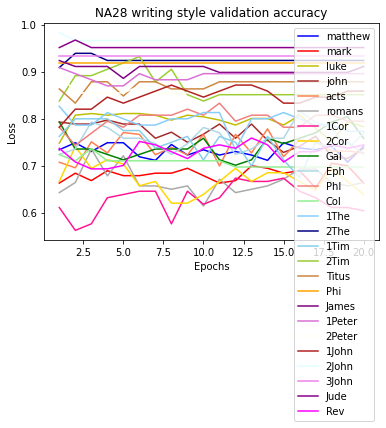

In [ ]:
## make a plot to overview
import matplotlib.pyplot as plt

matvac = mat.history['val_accuracy']
makvac = mak.history['val_accuracy']
lukvac = luk.history['val_accuracy']
johvac = joh.history['val_accuracy']
actvac = act.history['val_accuracy']
romvac = rom.history['val_accuracy']
fcrvac = fcr.history['val_accuracy']
scrvac = scr.history['val_accuracy']
gltvac = glt.history['val_accuracy']
eptvac = ept.history['val_accuracy']
plpvac = plp.history['val_accuracy']
clsvac = cls.history['val_accuracy']
ftlvac = ftl.history['val_accuracy']
stlvac = stl.history['val_accuracy']
ftmvac = ftm.history['val_accuracy']
stmvac = stm.history['val_accuracy']
tusvac = tus.history['val_accuracy']
plmvac = plm.history['val_accuracy']
jamvac = jam.history['val_accuracy']
fptvac = fpt.history['val_accuracy']
sptvac = spt.history['val_accuracy']
fjnvac = fjn.history['val_accuracy']
sjnvac = sjn.history['val_accuracy']
tjnvac = tjn.history['val_accuracy']
jdevac = jde.history['val_accuracy']
rvlvac = rvl.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matvac, 'b', label='matthew')
plt.plot(epochs, makvac, 'r', label='mark')
plt.plot(epochs, lukvac, 'y', label='luke')
plt.plot(epochs, johvac, 'brown', label='john')
plt.plot(epochs, actvac, 'coral', label='acts')
plt.plot(epochs, romvac, 'darkgray', label='romans')
plt.plot(epochs, fcrvac, 'deeppink', label='1Cor')
plt.plot(epochs, scrvac, 'gold', label='2Cor')
plt.plot(epochs, gltvac, 'green', label='Gal')
plt.plot(epochs, eptvac, 'lightblue', label='Eph')
plt.plot(epochs, plpvac, 'lightcoral', label='Phl')
plt.plot(epochs, clsvac, 'lightgreen', label='Col')
plt.plot(epochs, ftlvac, 'lightskyblue', label='1The')
plt.plot(epochs, stlvac, 'navy', label='2The')
plt.plot(epochs, ftmvac, 'skyblue', label='1Tim')
plt.plot(epochs, stmvac, 'yellowgreen', label='2Tim')
plt.plot(epochs, tusvac, 'peru', label='Titus')
plt.plot(epochs, plmvac, 'orange', label='Phi')
plt.plot(epochs, jamvac, 'purple', label='James')
plt.plot(epochs, fptvac, 'orchid', label='1Peter')
plt.plot(epochs, sptvac, 'ivory', label='2Peter')
plt.plot(epochs, fjnvac, 'firebrick', label='1John')
plt.plot(epochs, sjnvac, 'lightcyan', label='2John')
plt.plot(epochs, tjnvac, 'violet', label='3John')
plt.plot(epochs, jdevac, 'darkmagenta', label='Jude')
plt.plot(epochs, rvlvac, 'magenta', label='Rev')
plt.title('NA28 writing style validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
mat_s1 = cosine_text(Matthew)
mark_s1 = cosine_text(Mark)
luke_s1 = cosine_text(Luke_Book)
jam_s1 = cosine_text(James)
pet_s1 = cosine_text(Peter_letter)
john_s1 = cosine_text(John_Book.dropna())
jude_s1 = cosine_text(Jude)
pl_s1 = cosine_text(Paul_letters)

In [ ]:
mat_s11 = text_author(Matthew)
mark_s11 = text_author(Mark)
luke_s11 = text_author(Luke_Book)
jam_s11 = text_author(James)
pet_s11 = text_author(Peter_letter)
john_s11 = text_author(John_Book.dropna())
jude_s11 = text_author(Jude)
pl_s11 = text_author(Paul_letters)

In [ ]:
matthewbook = model_output(mat_s1,mat_s11)

Epoch 1/20
34/34 [==============================] - 3s 87ms/step - loss: 2.2421 - accuracy: 0.7563 - val_loss: 2.2357 - val_accuracy: 0.7566
Epoch 2/20
34/34 [==============================] - 2s 46ms/step - loss: 1.5029 - accuracy: 0.8397 - val_loss: 2.1047 - val_accuracy: 0.7603
Epoch 3/20
34/34 [==============================] - 2s 46ms/step - loss: 1.1729 - accuracy: 0.8632 - val_loss: 1.8473 - val_accuracy: 0.8052
Epoch 4/20
34/34 [==============================] - 2s 46ms/step - loss: 0.9970 - accuracy: 0.8950 - val_loss: 1.8292 - val_accuracy: 0.7940
Epoch 5/20
34/34 [==============================] - 2s 47ms/step - loss: 0.8980 - accuracy: 0.9138 - val_loss: 1.7873 - val_accuracy: 0.8015
Epoch 6/20
34/34 [==============================] - 2s 47ms/step - loss: 0.8512 - accuracy: 0.9175 - val_loss: 2.3823 - val_accuracy: 0.7753
Epoch 7/20
34/34 [==============================] - 2s 46ms/step - loss: 0.8245 - accuracy: 0.9288 - val_loss: 1.9630 - val_accuracy: 0.7828
Epoch 8/20
34

In [ ]:
markbook = model_output(mark_s1,mark_s11)

Epoch 1/20
24/24 [==============================] - 2s 104ms/step - loss: 1.6158 - accuracy: 0.8536 - val_loss: 1.9327 - val_accuracy: 0.8158
Epoch 2/20
24/24 [==============================] - 1s 46ms/step - loss: 1.2450 - accuracy: 0.8997 - val_loss: 1.6532 - val_accuracy: 0.8053
Epoch 3/20
24/24 [==============================] - 1s 46ms/step - loss: 1.0631 - accuracy: 0.9156 - val_loss: 1.7880 - val_accuracy: 0.8053
Epoch 4/20
24/24 [==============================] - 1s 46ms/step - loss: 0.9502 - accuracy: 0.9354 - val_loss: 1.6676 - val_accuracy: 0.8000
Epoch 5/20
24/24 [==============================] - 1s 47ms/step - loss: 0.8689 - accuracy: 0.9288 - val_loss: 1.9875 - val_accuracy: 0.7789
Epoch 6/20
24/24 [==============================] - 1s 48ms/step - loss: 0.7843 - accuracy: 0.9288 - val_loss: 1.6070 - val_accuracy: 0.8000
Epoch 7/20
24/24 [==============================] - 1s 45ms/step - loss: 0.7192 - accuracy: 0.9512 - val_loss: 1.5824 - val_accuracy: 0.8105
Epoch 8/20
2

In [ ]:
lukebook = model_output(luke_s1,luke_s11)

Epoch 1/20
61/61 [==============================] - 4s 72ms/step - loss: 0.9157 - accuracy: 0.9013 - val_loss: 0.6913 - val_accuracy: 0.9274
Epoch 2/20
61/61 [==============================] - 3s 48ms/step - loss: 0.7228 - accuracy: 0.9273 - val_loss: 0.6836 - val_accuracy: 0.9253
Epoch 3/20
61/61 [==============================] - 3s 47ms/step - loss: 0.6490 - accuracy: 0.9377 - val_loss: 0.6118 - val_accuracy: 0.9170
Epoch 4/20
61/61 [==============================] - 3s 47ms/step - loss: 0.5436 - accuracy: 0.9460 - val_loss: 0.5726 - val_accuracy: 0.9149
Epoch 5/20
61/61 [==============================] - 3s 47ms/step - loss: 0.5493 - accuracy: 0.9538 - val_loss: 0.6943 - val_accuracy: 0.9108
Epoch 6/20
61/61 [==============================] - 3s 47ms/step - loss: 0.4985 - accuracy: 0.9600 - val_loss: 0.8859 - val_accuracy: 0.9025
Epoch 7/20
61/61 [==============================] - 3s 48ms/step - loss: 0.4333 - accuracy: 0.9616 - val_loss: 0.9923 - val_accuracy: 0.9046
Epoch 8/20
61

In [ ]:
jams = model_output(jam_s1,jam_s11)

Epoch 1/20
10/10 [==============================] - 2s 186ms/step - loss: 2.0943 - accuracy: 0.8045 - val_loss: 1.8369 - val_accuracy: 0.8354
Epoch 2/20
10/10 [==============================] - 0s 43ms/step - loss: 1.5510 - accuracy: 0.8654 - val_loss: 1.8369 - val_accuracy: 0.8481
Epoch 3/20
10/10 [==============================] - 0s 45ms/step - loss: 1.1375 - accuracy: 0.9038 - val_loss: 1.8199 - val_accuracy: 0.8481
Epoch 4/20
10/10 [==============================] - 0s 45ms/step - loss: 1.0046 - accuracy: 0.9263 - val_loss: 2.0136 - val_accuracy: 0.8228
Epoch 5/20
10/10 [==============================] - 0s 45ms/step - loss: 0.9816 - accuracy: 0.9359 - val_loss: 2.0017 - val_accuracy: 0.8354
Epoch 6/20
10/10 [==============================] - 0s 44ms/step - loss: 0.9794 - accuracy: 0.9359 - val_loss: 2.0024 - val_accuracy: 0.8354
Epoch 7/20
10/10 [==============================] - 0s 46ms/step - loss: 0.9792 - accuracy: 0.9359 - val_loss: 2.0024 - val_accuracy: 0.8354
Epoch 8/20
1

In [ ]:
peter = model_output(pet_s1,pet_s11)

Epoch 1/20
12/12 [==============================] - 2s 161ms/step - loss: 1.5238 - accuracy: 0.8588 - val_loss: 0.9809 - val_accuracy: 0.8876
Epoch 2/20
12/12 [==============================] - 1s 46ms/step - loss: 1.2853 - accuracy: 0.9011 - val_loss: 1.4354 - val_accuracy: 0.8764
Epoch 3/20
12/12 [==============================] - 1s 44ms/step - loss: 1.2230 - accuracy: 0.9181 - val_loss: 0.5973 - val_accuracy: 0.9326
Epoch 4/20
12/12 [==============================] - 1s 44ms/step - loss: 1.2159 - accuracy: 0.9153 - val_loss: 0.7814 - val_accuracy: 0.9326
Epoch 5/20
12/12 [==============================] - 1s 43ms/step - loss: 1.2086 - accuracy: 0.9209 - val_loss: 0.7814 - val_accuracy: 0.9326
Epoch 6/20
12/12 [==============================] - 1s 44ms/step - loss: 1.2086 - accuracy: 0.9209 - val_loss: 0.7814 - val_accuracy: 0.9326
Epoch 7/20
12/12 [==============================] - 1s 43ms/step - loss: 1.2086 - accuracy: 0.9209 - val_loss: 0.7814 - val_accuracy: 0.9326
Epoch 8/20
1

In [ ]:
johnbook = model_output(john_s1,john_s11)

Epoch 1/20
43/43 [==============================] - 3s 80ms/step - loss: 1.2227 - accuracy: 0.8833 - val_loss: 1.0691 - val_accuracy: 0.8968
Epoch 2/20
43/43 [==============================] - 2s 48ms/step - loss: 1.0615 - accuracy: 0.9062 - val_loss: 1.0243 - val_accuracy: 0.9027
Epoch 3/20
43/43 [==============================] - 2s 47ms/step - loss: 0.7744 - accuracy: 0.9313 - val_loss: 0.8983 - val_accuracy: 0.8850
Epoch 4/20
43/43 [==============================] - 2s 47ms/step - loss: 0.5968 - accuracy: 0.9446 - val_loss: 0.9517 - val_accuracy: 0.8909
Epoch 5/20
43/43 [==============================] - 2s 47ms/step - loss: 0.5621 - accuracy: 0.9579 - val_loss: 0.8445 - val_accuracy: 0.8909
Epoch 6/20
43/43 [==============================] - 2s 48ms/step - loss: 0.5042 - accuracy: 0.9594 - val_loss: 1.0478 - val_accuracy: 0.8791
Epoch 7/20
43/43 [==============================] - 2s 47ms/step - loss: 0.5141 - accuracy: 0.9638 - val_loss: 1.1563 - val_accuracy: 0.8732
Epoch 8/20
43

In [ ]:
jude = model_output(jude_s1,jude_s11)

Epoch 1/20
8/8 [==============================] - 2s 217ms/step - loss: 1.4099 - accuracy: 0.8862 - val_loss: 1.5236 - val_accuracy: 0.8710
Epoch 2/20
8/8 [==============================] - 0s 44ms/step - loss: 0.9760 - accuracy: 0.9146 - val_loss: 1.7435 - val_accuracy: 0.8871
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 0.9330 - accuracy: 0.9390 - val_loss: 1.7406 - val_accuracy: 0.8871
Epoch 4/20
8/8 [==============================] - 0s 44ms/step - loss: 0.9320 - accuracy: 0.9390 - val_loss: 1.7406 - val_accuracy: 0.8871
Epoch 5/20
8/8 [==============================] - 0s 43ms/step - loss: 0.9320 - accuracy: 0.9390 - val_loss: 1.7406 - val_accuracy: 0.8871
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.9320 - accuracy: 0.9390 - val_loss: 1.7406 - val_accuracy: 0.8871
Epoch 7/20
8/8 [==============================] - 0s 45ms/step - loss: 0.9320 - accuracy: 0.9390 - val_loss: 1.7406 - val_accuracy: 0.8871
Epoch 8/20
8/8 [==========

In [ ]:
paul = model_output(pl_s1,pl_s11)

Epoch 1/20
58/58 [==============================] - 4s 72ms/step - loss: 1.0322 - accuracy: 0.8939 - val_loss: 0.3752 - val_accuracy: 0.9476
Epoch 2/20
58/58 [==============================] - 3s 49ms/step - loss: 0.7446 - accuracy: 0.9289 - val_loss: 0.6150 - val_accuracy: 0.9367
Epoch 3/20
58/58 [==============================] - 3s 47ms/step - loss: 0.6384 - accuracy: 0.9376 - val_loss: 0.4210 - val_accuracy: 0.9520
Epoch 4/20
58/58 [==============================] - 3s 48ms/step - loss: 0.5397 - accuracy: 0.9524 - val_loss: 0.3668 - val_accuracy: 0.9410
Epoch 5/20
58/58 [==============================] - 3s 48ms/step - loss: 0.5252 - accuracy: 0.9595 - val_loss: 0.5351 - val_accuracy: 0.9301
Epoch 6/20
58/58 [==============================] - 3s 48ms/step - loss: 0.5086 - accuracy: 0.9579 - val_loss: 0.4858 - val_accuracy: 0.9258
Epoch 7/20
58/58 [==============================] - 3s 48ms/step - loss: 0.4367 - accuracy: 0.9661 - val_loss: 0.4818 - val_accuracy: 0.9258
Epoch 8/20
58

In [ ]:
au_loss = {'Matthew_book':matthewbook.history['loss'],'Mark_book':markbook.history['loss'],'Luke_book':lukebook.history['loss'],'John_book':johnbook.history['loss'],
           'Paul_book':paul.history['loss'],'James_book':jams.history['loss'],'Jude_book':jude.history['loss'],'Peter_book':peter.history['loss']}
na28_loss = DataFrame(au_loss)

au_val_loss = {'Matthew_book':matthewbook.history['val_loss'],'Mark_book':markbook.history['val_loss'],'Luke_book':lukebook.history['val_loss'],'John_book':johnbook.history['val_loss'],
           'Paul_book':paul.history['val_loss'],'James_book':jams.history['val_loss'],'Jude_book':jude.history['val_loss'],'Peter_book':peter.history['val_loss']}
na28_val_loss = DataFrame(au_val_loss)

au_accuracy = {'Matthew_book':matthewbook.history['accuracy'],'Mark_book':markbook.history['accuracy'],'Luke_book':lukebook.history['accuracy'],'John_book':johnbook.history['accuracy'],
           'Paul_book':paul.history['accuracy'],'James_book':jams.history['accuracy'],'Jude_book':jude.history['accuracy'],'Peter_book':peter.history['accuracy']}
na28_accuracy = DataFrame(au_accuracy)

au_val_accuracy = {'Matthew_book':matthewbook.history['val_accuracy'],'Mark_book':markbook.history['val_accuracy'],'Luke_book':lukebook.history['val_accuracy'],'John_book':johnbook.history['val_accuracy'],
           'Paul_book':paul.history['val_accuracy'],'James_book':jams.history['val_accuracy'],'Jude_book':jude.history['val_accuracy'],'Peter_book':peter.history['val_accuracy']}
na28_val_accuracy = DataFrame(au_val_accuracy)

In [ ]:
na28_loss.to_excel('spacy author NA28 LOSS.xlsx',encoding = 'utf-8', index = False)
na28_accuracy.to_excel('spacy author NA28 ACCURACY.xlsx',encoding = 'utf-8', index = False)  
na28_val_loss.to_excel('spacy author NA28 VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
na28_val_accuracy.to_excel('spacy author NA28 VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)   

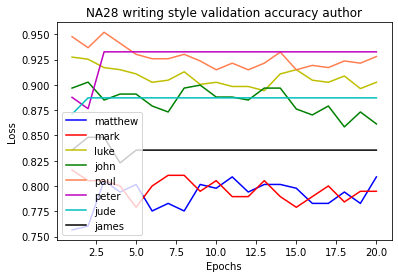

In [ ]:
matthewvac = matthewbook.history['val_accuracy']
markvac = markbook.history['val_accuracy']
lukevac = lukebook.history['val_accuracy']
johnvac = johnbook.history['val_accuracy']
paulvac = paul.history['val_accuracy']
petervac = peter.history['val_accuracy']
judevac = jude.history['val_accuracy']
jamesvac = jams.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matthewvac, 'b', label='matthew')
plt.plot(epochs, markvac, 'r', label='mark')
plt.plot(epochs, lukevac, 'y', label='luke')
plt.plot(epochs, johnvac, 'g', label='john')
plt.plot(epochs, paulvac, 'coral', label='paul')
plt.plot(epochs, petervac, 'm', label='peter')
plt.plot(epochs, judevac, 'c', label='jude')
plt.plot(epochs, jamesvac, 'k', label='james')

plt.title('NA28 writing style validation accuracy author')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## SBL_version

In [12]:
Matthew = df2[df2.BookName == 'Mt']
Matthew['Author'] = 'Matthew'
Mark = df2[df2.BookName == 'Mk']
Mark['Author'] = 'Mark'
Luke = df2[df2.BookName == 'Lk']
Luke['Author'] = 'Luke'
John = df2[df2.BookName == 'Jn']
John['Author'] = 'John'
Acts = df2[df2.BookName == 'Ac']
Acts['Author'] = 'Luke'
Luke_Book = pd.concat([Luke,Acts],axis = 0)
James = df2[df2.BookName == 'Jas']
James['Author'] = 'James'
f_Peter = df2[df2.BookName == '1Pe']
s_Peter = df2[df2.BookName == '2Pe']
f_Peter['Author'] = 'Peter'
s_Peter['Author'] = 'Peter'
Peter_letter = pd.concat([f_Peter, s_Peter], axis = 0)

f_John = df2[df2.BookName == '1Jn']
s_John = df2[df2.BookName == '2Jn']
t_John = df2[df2.BookName == '3Jn']
f_John['Author'] = 'John'
s_John['Author'] = 'John'
t_John['Author'] = 'John'
John_letter = pd.concat([f_John, s_John, t_John], axis = 0)

Jude = df2[df2.BookName == 'Jud']
Jude['Author'] = 'Jude'
Rev = df2[df2.BookName == 'Re']
Rev['Author'] = 'John'
John_Book = pd.concat([John,John_letter,Rev],axis = 0)

In [13]:
Romans = df2[df2.BookName == 'Ro']
Romans['Author'] = 'Paul'
f_cor = df2[df2.BookName == '1Co']
f_cor['Author'] = 'Paul'
s_cor = df2[df2.BookName == '2Co']
s_cor['Author'] = 'Paul'
Gal = df2[df2.BookName == 'Ga']
Gal['Author'] = 'Paul'
Eph = df2[df2.BookName == 'Eph']
Eph['Author'] = 'Paul'
Phi = df2[df2.BookName == 'Php']
Phi['Author'] = 'Paul'
Col = df2[df2.BookName == 'Col']
Col['Author'] = 'Paul'
f_the = df2[df2.BookName == '1Th']
f_the['Author'] = 'Paul'
s_the = df2[df2.BookName == '2Th']
s_the['Author'] = 'Paul'
f_tim = df2[df2.BookName == '1Ti']
f_tim['Author'] = 'Paul'
s_tim = df2[df2.BookName == '2Ti']
s_tim['Author'] = 'Paul'
Titus = df2[df2.BookName == 'Tit']
Titus['Author'] = 'Paul'
Philemon = df2[df2.BookName == 'Phm']
Philemon['Author'] = 'Paul'
Paul_letters = pd.concat([Romans,f_cor,s_cor,Gal,Eph,Phi,Col,f_the,s_the,f_tim,s_tim,Titus,Philemon],axis = 0)
Heb = df2[df2.BookName == 'Heb']
Heb['Author'] = 'Paul?'

In [14]:
g1 = cosine_text(Matthew)
g2 = cosine_text(Mark)
g3 = cosine_text(Luke)
g4 = cosine_text(John)
acts = cosine_text(Acts)
rms = cosine_text(Romans)
fcor = cosine_text(f_cor)
scor = cosine_text(s_cor)
gal = cosine_text(Gal)
eph = cosine_text(Eph)
phi = cosine_text(Phi)
col = cosine_text(Col)
fthe = cosine_text(f_the)
sthe = cosine_text(s_the)
ftim = cosine_text(f_tim)
stim = cosine_text(s_tim)
titus = cosine_text(Titus)
philemon = cosine_text(Philemon)
jams = cosine_text(James)
fpet = cosine_text(f_Peter)
spet = cosine_text(s_Peter)
fjohn = cosine_text(f_John)
sjohn = cosine_text(s_John)
tjohn = cosine_text(t_John.dropna())
jud = cosine_text(Jude)
rev = cosine_text(Rev)

In [15]:
g11 = text_author(Matthew)
g21 = text_author(Mark)
g31 = text_author(Luke)
g41 = text_author(John)
acts1 = text_author(Acts)
rms1 = text_author(Romans)
fcor1 = text_author(f_cor)
scor1 = text_author(s_cor)
gal1 = text_author(Gal)
eph1 = text_author(Eph)
phi1 = text_author(Phi)
col1 = text_author(Col)
fthe1 = text_author(f_the)
sthe1 = text_author(s_the)
ftim1 = text_author(f_tim)
stim1 = text_author(s_tim)
titus1 = text_author(Titus)
philemon1 = text_author(Philemon)
jams1 = text_author(James)
fpet1 = text_author(f_Peter)
spet1 = text_author(s_Peter)
fjohn1 = text_author(f_John)
sjohn1 = text_author(s_John)
tjohn1 = text_author(t_John.dropna())
jud1 = text_author(Jude)
rev1 = text_author(Rev)

In [16]:
mat = model_output(g1,g11)

Epoch 1/20
35/35 [==============================] - 3s 94ms/step - loss: 2.0253 - accuracy: 0.5493 - val_loss: 0.6721 - val_accuracy: 0.6800
Epoch 2/20
35/35 [==============================] - 2s 52ms/step - loss: 0.6635 - accuracy: 0.7400 - val_loss: 0.8301 - val_accuracy: 0.2400
Epoch 3/20
35/35 [==============================] - 2s 51ms/step - loss: 0.5796 - accuracy: 0.7172 - val_loss: 0.5458 - val_accuracy: 0.7745
Epoch 4/20
35/35 [==============================] - 2s 49ms/step - loss: 0.5863 - accuracy: 0.7308 - val_loss: 0.6008 - val_accuracy: 0.7745
Epoch 5/20
35/35 [==============================] - 2s 52ms/step - loss: 0.5732 - accuracy: 0.7226 - val_loss: 0.5439 - val_accuracy: 0.7782
Epoch 6/20
35/35 [==============================] - 2s 50ms/step - loss: 0.5683 - accuracy: 0.7637 - val_loss: 0.5290 - val_accuracy: 0.7745
Epoch 7/20
35/35 [==============================] - 2s 51ms/step - loss: 0.5928 - accuracy: 0.7719 - val_loss: 0.5614 - val_accuracy: 0.7745
Epoch 8/20
35

In [17]:
mak = model_output(g2,g21)

Epoch 1/20
25/25 [==============================] - 3s 104ms/step - loss: 0.6281 - accuracy: 0.6859 - val_loss: 0.5938 - val_accuracy: 0.7296
Epoch 2/20
25/25 [==============================] - 1s 49ms/step - loss: 0.5961 - accuracy: 0.6897 - val_loss: 0.5942 - val_accuracy: 0.7449
Epoch 3/20
25/25 [==============================] - 1s 50ms/step - loss: 0.5833 - accuracy: 0.7013 - val_loss: 0.5750 - val_accuracy: 0.7245
Epoch 4/20
25/25 [==============================] - 1s 51ms/step - loss: 0.5844 - accuracy: 0.6859 - val_loss: 0.5676 - val_accuracy: 0.7398
Epoch 5/20
25/25 [==============================] - 1s 50ms/step - loss: 0.6001 - accuracy: 0.7026 - val_loss: 0.5709 - val_accuracy: 0.7449
Epoch 6/20
25/25 [==============================] - 1s 50ms/step - loss: 0.5775 - accuracy: 0.7051 - val_loss: 0.7434 - val_accuracy: 0.7194
Epoch 7/20
25/25 [==============================] - 1s 48ms/step - loss: 0.5668 - accuracy: 0.7013 - val_loss: 0.6089 - val_accuracy: 0.6888
Epoch 8/20
2

In [18]:
luk = model_output(g3,g31)

Epoch 1/20
37/37 [==============================] - 3s 89ms/step - loss: 0.6550 - accuracy: 0.7709 - val_loss: 0.6015 - val_accuracy: 0.7148
Epoch 2/20
37/37 [==============================] - 2s 51ms/step - loss: 0.5291 - accuracy: 0.7786 - val_loss: 0.5451 - val_accuracy: 0.7904
Epoch 3/20
37/37 [==============================] - 2s 51ms/step - loss: 0.5274 - accuracy: 0.7812 - val_loss: 0.6186 - val_accuracy: 0.7869
Epoch 4/20
37/37 [==============================] - 2s 52ms/step - loss: 0.5022 - accuracy: 0.7847 - val_loss: 0.5535 - val_accuracy: 0.7766
Epoch 5/20
37/37 [==============================] - 2s 51ms/step - loss: 0.4834 - accuracy: 0.7898 - val_loss: 0.5400 - val_accuracy: 0.7629
Epoch 6/20
37/37 [==============================] - 2s 51ms/step - loss: 0.5122 - accuracy: 0.7864 - val_loss: 0.7426 - val_accuracy: 0.7938
Epoch 7/20
37/37 [==============================] - 2s 51ms/step - loss: 0.4978 - accuracy: 0.7881 - val_loss: 0.8415 - val_accuracy: 0.7869
Epoch 8/20
37

In [19]:
joh = model_output(g4,g41)

Epoch 1/20
30/30 [==============================] - 3s 97ms/step - loss: 1.0019 - accuracy: 0.7380 - val_loss: 0.7722 - val_accuracy: 0.7564
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.8076 - accuracy: 0.7572 - val_loss: 1.0717 - val_accuracy: 0.7564
Epoch 3/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6530 - accuracy: 0.7722 - val_loss: 1.1657 - val_accuracy: 0.7308
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.6525 - accuracy: 0.7850 - val_loss: 0.5958 - val_accuracy: 0.6709
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5827 - accuracy: 0.7797 - val_loss: 0.7811 - val_accuracy: 0.7308
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5491 - accuracy: 0.7829 - val_loss: 1.1992 - val_accuracy: 0.7308
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5397 - accuracy: 0.7925 - val_loss: 1.0675 - val_accuracy: 0.7564
Epoch 8/20
30

In [20]:
act = model_output(acts,acts1)

Epoch 1/20
33/33 [==============================] - 3s 94ms/step - loss: 1.1700 - accuracy: 0.7318 - val_loss: 0.8892 - val_accuracy: 0.7778
Epoch 2/20
33/33 [==============================] - 2s 50ms/step - loss: 0.7833 - accuracy: 0.7605 - val_loss: 0.7448 - val_accuracy: 0.7701
Epoch 3/20
33/33 [==============================] - 2s 51ms/step - loss: 0.7251 - accuracy: 0.7529 - val_loss: 0.6716 - val_accuracy: 0.7893
Epoch 4/20
33/33 [==============================] - 2s 50ms/step - loss: 0.6596 - accuracy: 0.7874 - val_loss: 0.6705 - val_accuracy: 0.7739
Epoch 5/20
33/33 [==============================] - 2s 51ms/step - loss: 0.6699 - accuracy: 0.7969 - val_loss: 0.6962 - val_accuracy: 0.7701
Epoch 6/20
33/33 [==============================] - 2s 49ms/step - loss: 0.5884 - accuracy: 0.7816 - val_loss: 0.6164 - val_accuracy: 0.7816
Epoch 7/20
33/33 [==============================] - 2s 50ms/step - loss: 0.4835 - accuracy: 0.8027 - val_loss: 0.7094 - val_accuracy: 0.7701
Epoch 8/20
33

In [21]:
rom = model_output(rms,rms1)

Epoch 1/20
19/19 [==============================] - 3s 145ms/step - loss: 2.0086 - accuracy: 0.6570 - val_loss: 1.7266 - val_accuracy: 0.6667
Epoch 2/20
19/19 [==============================] - 1s 48ms/step - loss: 1.7952 - accuracy: 0.6587 - val_loss: 1.7976 - val_accuracy: 0.6531
Epoch 3/20
19/19 [==============================] - 1s 49ms/step - loss: 1.6397 - accuracy: 0.6758 - val_loss: 1.8440 - val_accuracy: 0.6735
Epoch 4/20
19/19 [==============================] - 1s 50ms/step - loss: 1.2859 - accuracy: 0.6997 - val_loss: 1.1672 - val_accuracy: 0.6463
Epoch 5/20
19/19 [==============================] - 1s 49ms/step - loss: 0.9302 - accuracy: 0.7355 - val_loss: 1.1022 - val_accuracy: 0.6463
Epoch 6/20
19/19 [==============================] - 1s 50ms/step - loss: 0.9134 - accuracy: 0.7491 - val_loss: 1.2530 - val_accuracy: 0.6531
Epoch 7/20
19/19 [==============================] - 1s 50ms/step - loss: 0.7894 - accuracy: 0.7816 - val_loss: 1.1561 - val_accuracy: 0.6259
Epoch 8/20
1

In [22]:
fcr = model_output(fcor,fcor1)

Epoch 1/20
19/19 [==============================] - 2s 125ms/step - loss: 2.2175 - accuracy: 0.6943 - val_loss: 0.9366 - val_accuracy: 0.7365
Epoch 2/20
19/19 [==============================] - 1s 47ms/step - loss: 1.1422 - accuracy: 0.7652 - val_loss: 0.7858 - val_accuracy: 0.7703
Epoch 3/20
19/19 [==============================] - 1s 48ms/step - loss: 0.8851 - accuracy: 0.8041 - val_loss: 0.6331 - val_accuracy: 0.7635
Epoch 4/20
19/19 [==============================] - 1s 49ms/step - loss: 0.7817 - accuracy: 0.8361 - val_loss: 0.6969 - val_accuracy: 0.7703
Epoch 5/20
19/19 [==============================] - 1s 47ms/step - loss: 0.6760 - accuracy: 0.8564 - val_loss: 0.7131 - val_accuracy: 0.7703
Epoch 6/20
19/19 [==============================] - 1s 48ms/step - loss: 0.6064 - accuracy: 0.8851 - val_loss: 1.1503 - val_accuracy: 0.7635
Epoch 7/20
19/19 [==============================] - 1s 50ms/step - loss: 0.6049 - accuracy: 0.9003 - val_loss: 1.3756 - val_accuracy: 0.7432
Epoch 8/20
1

In [23]:
scr = model_output(scor,scor1)

Epoch 1/20
14/14 [==============================] - 2s 150ms/step - loss: 2.4316 - accuracy: 0.7092 - val_loss: 1.6284 - val_accuracy: 0.7500
Epoch 2/20
14/14 [==============================] - 1s 49ms/step - loss: 1.7504 - accuracy: 0.7987 - val_loss: 1.6140 - val_accuracy: 0.7143
Epoch 3/20
14/14 [==============================] - 1s 50ms/step - loss: 1.4268 - accuracy: 0.7830 - val_loss: 1.9566 - val_accuracy: 0.8036
Epoch 4/20
14/14 [==============================] - 1s 48ms/step - loss: 1.2355 - accuracy: 0.8523 - val_loss: 1.6708 - val_accuracy: 0.7768
Epoch 5/20
14/14 [==============================] - 1s 49ms/step - loss: 1.0963 - accuracy: 0.8814 - val_loss: 1.6623 - val_accuracy: 0.7589
Epoch 6/20
14/14 [==============================] - 1s 48ms/step - loss: 0.9652 - accuracy: 0.8993 - val_loss: 1.7275 - val_accuracy: 0.7768
Epoch 7/20
14/14 [==============================] - 1s 48ms/step - loss: 0.9715 - accuracy: 0.9172 - val_loss: 1.8537 - val_accuracy: 0.7768
Epoch 8/20
1

In [24]:
glt = model_output(gal,gal1)

Epoch 1/20
12/12 [==============================] - 2s 165ms/step - loss: 1.8908 - accuracy: 0.7784 - val_loss: 1.9159 - val_accuracy: 0.7363
Epoch 2/20
12/12 [==============================] - 1s 49ms/step - loss: 1.5505 - accuracy: 0.8421 - val_loss: 1.8363 - val_accuracy: 0.8132
Epoch 3/20
12/12 [==============================] - 1s 46ms/step - loss: 1.4725 - accuracy: 0.8837 - val_loss: 1.9982 - val_accuracy: 0.8132
Epoch 4/20
12/12 [==============================] - 1s 50ms/step - loss: 1.5366 - accuracy: 0.8726 - val_loss: 2.1291 - val_accuracy: 0.8132
Epoch 5/20
12/12 [==============================] - 1s 47ms/step - loss: 1.4389 - accuracy: 0.8975 - val_loss: 2.0082 - val_accuracy: 0.8132
Epoch 6/20
12/12 [==============================] - 1s 47ms/step - loss: 1.4191 - accuracy: 0.9058 - val_loss: 1.8884 - val_accuracy: 0.8022
Epoch 7/20
12/12 [==============================] - 1s 49ms/step - loss: 1.4154 - accuracy: 0.9086 - val_loss: 2.1661 - val_accuracy: 0.8132
Epoch 8/20
1

In [25]:
ept = model_output(eph,eph1)

Epoch 1/20
12/12 [==============================] - 2s 167ms/step - loss: 1.5418 - accuracy: 0.8279 - val_loss: 1.2762 - val_accuracy: 0.8804
Epoch 2/20
12/12 [==============================] - 1s 48ms/step - loss: 1.1590 - accuracy: 0.8825 - val_loss: 1.4002 - val_accuracy: 0.9022
Epoch 3/20
12/12 [==============================] - 1s 50ms/step - loss: 1.0879 - accuracy: 0.9098 - val_loss: 1.3835 - val_accuracy: 0.9022
Epoch 4/20
12/12 [==============================] - 1s 49ms/step - loss: 1.0048 - accuracy: 0.9180 - val_loss: 1.3888 - val_accuracy: 0.9130
Epoch 5/20
12/12 [==============================] - 1s 47ms/step - loss: 0.9995 - accuracy: 0.9290 - val_loss: 1.9201 - val_accuracy: 0.8370
Epoch 6/20
12/12 [==============================] - 1s 49ms/step - loss: 1.0635 - accuracy: 0.9071 - val_loss: 1.2545 - val_accuracy: 0.9022
Epoch 7/20
12/12 [==============================] - 1s 47ms/step - loss: 0.9031 - accuracy: 0.9372 - val_loss: 1.2333 - val_accuracy: 0.8913
Epoch 8/20
1

In [26]:
plp = model_output(phi,phi1)

Epoch 1/20
11/11 [==============================] - 2s 171ms/step - loss: 1.4761 - accuracy: 0.8862 - val_loss: 1.8065 - val_accuracy: 0.8049
Epoch 2/20
11/11 [==============================] - 1s 46ms/step - loss: 1.2657 - accuracy: 0.8738 - val_loss: 1.5758 - val_accuracy: 0.7927
Epoch 3/20
11/11 [==============================] - 0s 45ms/step - loss: 1.1283 - accuracy: 0.9138 - val_loss: 1.8212 - val_accuracy: 0.8171
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 0.9820 - accuracy: 0.9231 - val_loss: 1.6708 - val_accuracy: 0.8049
Epoch 5/20
11/11 [==============================] - 0s 45ms/step - loss: 0.8794 - accuracy: 0.9354 - val_loss: 1.4800 - val_accuracy: 0.8415
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 0.8625 - accuracy: 0.9415 - val_loss: 1.6336 - val_accuracy: 0.8415
Epoch 7/20
11/11 [==============================] - 1s 46ms/step - loss: 0.8537 - accuracy: 0.9446 - val_loss: 1.6481 - val_accuracy: 0.8049
Epoch 8/20
1

In [27]:
cls = model_output(col,col1)

Epoch 1/20
10/10 [==============================] - 2s 187ms/step - loss: 1.0184 - accuracy: 0.8836 - val_loss: 1.1424 - val_accuracy: 0.8500
Epoch 2/20
10/10 [==============================] - 0s 45ms/step - loss: 0.6938 - accuracy: 0.9434 - val_loss: 1.1102 - val_accuracy: 0.8375
Epoch 3/20
10/10 [==============================] - 0s 50ms/step - loss: 0.6467 - accuracy: 0.9591 - val_loss: 1.1079 - val_accuracy: 0.8500
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 0.6358 - accuracy: 0.9560 - val_loss: 1.1081 - val_accuracy: 0.8375
Epoch 5/20
10/10 [==============================] - 0s 47ms/step - loss: 0.6326 - accuracy: 0.9591 - val_loss: 1.0793 - val_accuracy: 0.8500
Epoch 6/20
10/10 [==============================] - 0s 46ms/step - loss: 0.6321 - accuracy: 0.9591 - val_loss: 0.9721 - val_accuracy: 0.8500
Epoch 7/20
10/10 [==============================] - 0s 50ms/step - loss: 0.5634 - accuracy: 0.9591 - val_loss: 0.8406 - val_accuracy: 0.8875
Epoch 8/20
1

In [28]:
ftl = model_output(fthe,fthe1)

Epoch 1/20
10/10 [==============================] - 2s 188ms/step - loss: 0.7234 - accuracy: 0.8946 - val_loss: 0.9111 - val_accuracy: 0.8734
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 0.4947 - accuracy: 0.9233 - val_loss: 0.4016 - val_accuracy: 0.8608
Epoch 3/20
10/10 [==============================] - 0s 49ms/step - loss: 0.4242 - accuracy: 0.9681 - val_loss: 0.5748 - val_accuracy: 0.8734
Epoch 4/20
10/10 [==============================] - 0s 46ms/step - loss: 0.4117 - accuracy: 0.9681 - val_loss: 0.3486 - val_accuracy: 0.8861
Epoch 5/20
10/10 [==============================] - 0s 49ms/step - loss: 0.4048 - accuracy: 0.9712 - val_loss: 0.5370 - val_accuracy: 0.9114
Epoch 6/20
10/10 [==============================] - 0s 46ms/step - loss: 0.4031 - accuracy: 0.9744 - val_loss: 0.3681 - val_accuracy: 0.8987
Epoch 7/20
10/10 [==============================] - 0s 48ms/step - loss: 0.4017 - accuracy: 0.9712 - val_loss: 0.8351 - val_accuracy: 0.9241
Epoch 8/20
1

In [29]:
stl = model_output(sthe,sthe1)

Epoch 1/20
9/9 [==============================] - 2s 202ms/step - loss: 1.1302 - accuracy: 0.8821 - val_loss: 0.6858 - val_accuracy: 0.9429
Epoch 2/20
9/9 [==============================] - 0s 45ms/step - loss: 0.8207 - accuracy: 0.9250 - val_loss: 0.6754 - val_accuracy: 0.9571
Epoch 3/20
9/9 [==============================] - 0s 47ms/step - loss: 0.7419 - accuracy: 0.9429 - val_loss: 0.6689 - val_accuracy: 0.9571
Epoch 4/20
9/9 [==============================] - 0s 47ms/step - loss: 0.7825 - accuracy: 0.9429 - val_loss: 0.6794 - val_accuracy: 0.9429
Epoch 5/20
9/9 [==============================] - 0s 49ms/step - loss: 0.6822 - accuracy: 0.9464 - val_loss: 0.7126 - val_accuracy: 0.9286
Epoch 6/20
9/9 [==============================] - 0s 46ms/step - loss: 0.6641 - accuracy: 0.9571 - val_loss: 0.6715 - val_accuracy: 0.9571
Epoch 7/20
9/9 [==============================] - 0s 45ms/step - loss: 0.6644 - accuracy: 0.9536 - val_loss: 0.6929 - val_accuracy: 0.9429
Epoch 8/20
9/9 [==========

In [30]:
ftm = model_output(ftim,ftim1)

Epoch 1/20
11/11 [==============================] - 2s 172ms/step - loss: 2.1510 - accuracy: 0.8163 - val_loss: 1.6084 - val_accuracy: 0.8571
Epoch 2/20
11/11 [==============================] - 1s 47ms/step - loss: 1.7695 - accuracy: 0.8464 - val_loss: 1.7920 - val_accuracy: 0.8333
Epoch 3/20
11/11 [==============================] - 1s 47ms/step - loss: 1.6657 - accuracy: 0.8735 - val_loss: 1.7837 - val_accuracy: 0.8095
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 1.5949 - accuracy: 0.8886 - val_loss: 1.8286 - val_accuracy: 0.7857
Epoch 5/20
11/11 [==============================] - 0s 45ms/step - loss: 1.5818 - accuracy: 0.8946 - val_loss: 1.6398 - val_accuracy: 0.7976
Epoch 6/20
11/11 [==============================] - 1s 49ms/step - loss: 1.5405 - accuracy: 0.8946 - val_loss: 1.6336 - val_accuracy: 0.7976
Epoch 7/20
11/11 [==============================] - 1s 48ms/step - loss: 1.4744 - accuracy: 0.8916 - val_loss: 2.0410 - val_accuracy: 0.7857
Epoch 8/20
1

In [31]:
stm = model_output(stim,stim1)

Epoch 1/20
10/10 [==============================] - 2s 192ms/step - loss: 1.4310 - accuracy: 0.8701 - val_loss: 2.0104 - val_accuracy: 0.8462
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 1.2879 - accuracy: 0.8961 - val_loss: 1.6268 - val_accuracy: 0.8590
Epoch 3/20
10/10 [==============================] - 0s 48ms/step - loss: 1.2369 - accuracy: 0.9026 - val_loss: 1.6028 - val_accuracy: 0.8846
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1688 - accuracy: 0.9188 - val_loss: 1.6013 - val_accuracy: 0.8846
Epoch 5/20
10/10 [==============================] - 0s 46ms/step - loss: 1.1523 - accuracy: 0.9253 - val_loss: 1.6007 - val_accuracy: 0.8974
Epoch 6/20
10/10 [==============================] - 0s 49ms/step - loss: 1.1520 - accuracy: 0.9253 - val_loss: 1.4454 - val_accuracy: 0.8974
Epoch 7/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1528 - accuracy: 0.9253 - val_loss: 1.4442 - val_accuracy: 0.8718
Epoch 8/20
1

In [32]:
tus = model_output(titus,titus1)

Epoch 1/20
9/9 [==============================] - 2s 209ms/step - loss: 0.9924 - accuracy: 0.8817 - val_loss: 1.5897 - val_accuracy: 0.8714
Epoch 2/20
9/9 [==============================] - 0s 50ms/step - loss: 0.8390 - accuracy: 0.9427 - val_loss: 1.5830 - val_accuracy: 0.8714
Epoch 3/20
9/9 [==============================] - 0s 48ms/step - loss: 0.7872 - accuracy: 0.9462 - val_loss: 1.5864 - val_accuracy: 0.8571
Epoch 4/20
9/9 [==============================] - 0s 48ms/step - loss: 0.7759 - accuracy: 0.9498 - val_loss: 1.6030 - val_accuracy: 0.8571
Epoch 5/20
9/9 [==============================] - 0s 48ms/step - loss: 0.7734 - accuracy: 0.9498 - val_loss: 1.6030 - val_accuracy: 0.8571
Epoch 6/20
9/9 [==============================] - 0s 50ms/step - loss: 0.7734 - accuracy: 0.9498 - val_loss: 1.6030 - val_accuracy: 0.8571
Epoch 7/20
9/9 [==============================] - 0s 48ms/step - loss: 0.7734 - accuracy: 0.9498 - val_loss: 1.6030 - val_accuracy: 0.8571
Epoch 8/20
9/9 [==========

In [33]:
plm = model_output(philemon,philemon1)

Epoch 1/20
9/9 [==============================] - 2s 208ms/step - loss: 1.0447 - accuracy: 0.9160 - val_loss: 0.0736 - val_accuracy: 0.9697
Epoch 2/20
9/9 [==============================] - 0s 45ms/step - loss: 0.8492 - accuracy: 0.9351 - val_loss: 0.2734 - val_accuracy: 0.9697
Epoch 3/20
9/9 [==============================] - 0s 45ms/step - loss: 0.8349 - accuracy: 0.9427 - val_loss: 0.4674 - val_accuracy: 0.9697
Epoch 4/20
9/9 [==============================] - 0s 48ms/step - loss: 0.7648 - accuracy: 0.9504 - val_loss: 0.4674 - val_accuracy: 0.9697
Epoch 5/20
9/9 [==============================] - 0s 47ms/step - loss: 0.7640 - accuracy: 0.9504 - val_loss: 0.4674 - val_accuracy: 0.9697
Epoch 6/20
9/9 [==============================] - 0s 48ms/step - loss: 0.7640 - accuracy: 0.9504 - val_loss: 0.4674 - val_accuracy: 0.9697
Epoch 7/20
9/9 [==============================] - 0s 46ms/step - loss: 0.7640 - accuracy: 0.9504 - val_loss: 0.4674 - val_accuracy: 0.9697
Epoch 8/20
9/9 [==========

In [34]:
jam = model_output(jams,jams1)

Epoch 1/20
11/11 [==============================] - 2s 179ms/step - loss: 1.8193 - accuracy: 0.8232 - val_loss: 0.8040 - val_accuracy: 0.9277
Epoch 2/20
11/11 [==============================] - 0s 45ms/step - loss: 1.7401 - accuracy: 0.8354 - val_loss: 1.0211 - val_accuracy: 0.9036
Epoch 3/20
11/11 [==============================] - 1s 48ms/step - loss: 1.3956 - accuracy: 0.8841 - val_loss: 1.4907 - val_accuracy: 0.8554
Epoch 4/20
11/11 [==============================] - 1s 47ms/step - loss: 1.3741 - accuracy: 0.8902 - val_loss: 1.4440 - val_accuracy: 0.8313
Epoch 5/20
11/11 [==============================] - 1s 46ms/step - loss: 1.2265 - accuracy: 0.9055 - val_loss: 1.2297 - val_accuracy: 0.8795
Epoch 6/20
11/11 [==============================] - 1s 47ms/step - loss: 1.1252 - accuracy: 0.9146 - val_loss: 2.1255 - val_accuracy: 0.8434
Epoch 7/20
11/11 [==============================] - 1s 47ms/step - loss: 1.1656 - accuracy: 0.8933 - val_loss: 1.2666 - val_accuracy: 0.8675
Epoch 8/20
1

In [35]:
fpt = model_output(fpet,fpet1)

Epoch 1/20
11/11 [==============================] - 2s 179ms/step - loss: 0.9992 - accuracy: 0.8773 - val_loss: 1.4632 - val_accuracy: 0.8537
Epoch 2/20
11/11 [==============================] - 1s 50ms/step - loss: 0.7848 - accuracy: 0.9233 - val_loss: 1.3961 - val_accuracy: 0.8780
Epoch 3/20
11/11 [==============================] - 1s 47ms/step - loss: 0.6827 - accuracy: 0.9540 - val_loss: 1.2247 - val_accuracy: 0.8780
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 0.6723 - accuracy: 0.9571 - val_loss: 1.2337 - val_accuracy: 0.8780
Epoch 5/20
11/11 [==============================] - 1s 48ms/step - loss: 0.6301 - accuracy: 0.9540 - val_loss: 1.2337 - val_accuracy: 0.8780
Epoch 6/20
11/11 [==============================] - 1s 46ms/step - loss: 0.6209 - accuracy: 0.9601 - val_loss: 1.2465 - val_accuracy: 0.8659
Epoch 7/20
11/11 [==============================] - 1s 48ms/step - loss: 0.6150 - accuracy: 0.9601 - val_loss: 1.2364 - val_accuracy: 0.8780
Epoch 8/20
1

In [36]:
spt = model_output(spet,spet1)

Epoch 1/20
10/10 [==============================] - 2s 188ms/step - loss: 1.1754 - accuracy: 0.8763 - val_loss: 0.6562 - val_accuracy: 0.9589
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 0.9343 - accuracy: 0.9347 - val_loss: 1.4042 - val_accuracy: 0.8356
Epoch 3/20
10/10 [==============================] - 0s 46ms/step - loss: 0.7559 - accuracy: 0.9244 - val_loss: 0.4945 - val_accuracy: 0.9315
Epoch 4/20
10/10 [==============================] - 0s 46ms/step - loss: 0.6926 - accuracy: 0.9553 - val_loss: 0.4840 - val_accuracy: 0.9452
Epoch 5/20
10/10 [==============================] - 0s 44ms/step - loss: 0.6885 - accuracy: 0.9553 - val_loss: 0.4779 - val_accuracy: 0.9589
Epoch 6/20
10/10 [==============================] - 0s 47ms/step - loss: 0.6874 - accuracy: 0.9553 - val_loss: 0.4717 - val_accuracy: 0.9589
Epoch 7/20
10/10 [==============================] - 0s 43ms/step - loss: 0.6874 - accuracy: 0.9553 - val_loss: 0.4730 - val_accuracy: 0.9589
Epoch 8/20
1

In [37]:
fjn = model_output(fjohn,fjohn1)

Epoch 1/20
11/11 [==============================] - 2s 177ms/step - loss: 4.3193 - accuracy: 0.6288 - val_loss: 4.2568 - val_accuracy: 0.6341
Epoch 2/20
11/11 [==============================] - 1s 47ms/step - loss: 3.2349 - accuracy: 0.7515 - val_loss: 3.3495 - val_accuracy: 0.7317
Epoch 3/20
11/11 [==============================] - 1s 48ms/step - loss: 2.5714 - accuracy: 0.7730 - val_loss: 3.1217 - val_accuracy: 0.7439
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 2.0280 - accuracy: 0.8129 - val_loss: 3.8385 - val_accuracy: 0.6951
Epoch 5/20
11/11 [==============================] - 1s 49ms/step - loss: 1.7641 - accuracy: 0.8436 - val_loss: 3.4758 - val_accuracy: 0.7317
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 1.5515 - accuracy: 0.8620 - val_loss: 2.7774 - val_accuracy: 0.7561
Epoch 7/20
11/11 [==============================] - 1s 49ms/step - loss: 1.5674 - accuracy: 0.8834 - val_loss: 2.8757 - val_accuracy: 0.7805
Epoch 8/20
1

In [38]:
sjn = model_output(sjohn,sjohn1)

Epoch 1/20
8/8 [==============================] - 2s 225ms/step - loss: 0.3875 - accuracy: 0.9643 - val_loss: 0.2587 - val_accuracy: 0.9688
Epoch 2/20
8/8 [==============================] - 0s 46ms/step - loss: 0.3171 - accuracy: 0.9722 - val_loss: 0.2660 - val_accuracy: 0.9688
Epoch 3/20
8/8 [==============================] - 0s 48ms/step - loss: 0.3054 - accuracy: 0.9802 - val_loss: 0.2660 - val_accuracy: 0.9688
Epoch 4/20
8/8 [==============================] - 0s 47ms/step - loss: 0.3054 - accuracy: 0.9802 - val_loss: 0.2660 - val_accuracy: 0.9688
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.3054 - accuracy: 0.9802 - val_loss: 0.2660 - val_accuracy: 0.9688
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 0.3054 - accuracy: 0.9802 - val_loss: 0.2660 - val_accuracy: 0.9688
Epoch 7/20
8/8 [==============================] - 0s 46ms/step - loss: 0.3054 - accuracy: 0.9802 - val_loss: 0.2660 - val_accuracy: 0.9688
Epoch 8/20
8/8 [==========

In [39]:
tjn = model_output(tjohn,tjohn1)

Epoch 1/20
8/8 [==============================] - 2s 227ms/step - loss: 0.6745 - accuracy: 0.9528 - val_loss: 0.2913 - val_accuracy: 0.9688
Epoch 2/20
8/8 [==============================] - 0s 46ms/step - loss: 0.6686 - accuracy: 0.9567 - val_loss: 0.2878 - val_accuracy: 0.9531
Epoch 3/20
8/8 [==============================] - 0s 47ms/step - loss: 0.6673 - accuracy: 0.9567 - val_loss: 0.2878 - val_accuracy: 0.9531
Epoch 4/20
8/8 [==============================] - 0s 45ms/step - loss: 0.6673 - accuracy: 0.9567 - val_loss: 0.2878 - val_accuracy: 0.9531
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.6673 - accuracy: 0.9567 - val_loss: 0.2878 - val_accuracy: 0.9531
Epoch 6/20
8/8 [==============================] - 0s 46ms/step - loss: 0.6673 - accuracy: 0.9567 - val_loss: 0.2878 - val_accuracy: 0.9531
Epoch 7/20
8/8 [==============================] - 0s 49ms/step - loss: 0.6673 - accuracy: 0.9567 - val_loss: 0.2878 - val_accuracy: 0.9531
Epoch 8/20
8/8 [==========

In [40]:
jde = model_output(jud,jud1)

Epoch 1/20
9/9 [==============================] - 2s 204ms/step - loss: 0.6647 - accuracy: 0.9504 - val_loss: 1.2359 - val_accuracy: 0.9091
Epoch 2/20
9/9 [==============================] - 0s 48ms/step - loss: 0.3741 - accuracy: 0.9695 - val_loss: 1.4085 - val_accuracy: 0.9091
Epoch 3/20
9/9 [==============================] - 0s 48ms/step - loss: 0.2526 - accuracy: 0.9771 - val_loss: 1.0580 - val_accuracy: 0.8788
Epoch 4/20
9/9 [==============================] - 0s 46ms/step - loss: 0.2453 - accuracy: 0.9809 - val_loss: 1.2259 - val_accuracy: 0.9091
Epoch 5/20
9/9 [==============================] - 0s 45ms/step - loss: 0.2355 - accuracy: 0.9847 - val_loss: 1.2259 - val_accuracy: 0.9091
Epoch 6/20
9/9 [==============================] - 0s 47ms/step - loss: 0.2355 - accuracy: 0.9847 - val_loss: 1.2259 - val_accuracy: 0.9091
Epoch 7/20
9/9 [==============================] - 0s 48ms/step - loss: 0.2355 - accuracy: 0.9847 - val_loss: 1.2259 - val_accuracy: 0.9091
Epoch 8/20
9/9 [==========

In [41]:
rvl = model_output(rev,rev1)

Epoch 1/20
18/18 [==============================] - 2s 127ms/step - loss: 1.7587 - accuracy: 0.7951 - val_loss: 1.1916 - val_accuracy: 0.8169
Epoch 2/20
18/18 [==============================] - 1s 48ms/step - loss: 1.1572 - accuracy: 0.8693 - val_loss: 1.0231 - val_accuracy: 0.8169
Epoch 3/20
18/18 [==============================] - 1s 50ms/step - loss: 0.8934 - accuracy: 0.8975 - val_loss: 0.7891 - val_accuracy: 0.8310
Epoch 4/20
18/18 [==============================] - 1s 49ms/step - loss: 0.7772 - accuracy: 0.9382 - val_loss: 0.8319 - val_accuracy: 0.8662
Epoch 5/20
18/18 [==============================] - 1s 48ms/step - loss: 0.6785 - accuracy: 0.9293 - val_loss: 0.6800 - val_accuracy: 0.9014
Epoch 6/20
18/18 [==============================] - 1s 49ms/step - loss: 0.5347 - accuracy: 0.9505 - val_loss: 0.7835 - val_accuracy: 0.8873
Epoch 7/20
18/18 [==============================] - 1s 51ms/step - loss: 0.5083 - accuracy: 0.9629 - val_loss: 0.7880 - val_accuracy: 0.8873
Epoch 8/20
1

In [42]:
from pandas.core.frame import DataFrame
df_loss = {'Matthew':mat.history['loss'],'Mark':mak.history['loss'],'Luke':luk.history['loss'],'John':joh.history['loss'],
           'Acts':act.history['loss'],'Romans':rom.history['loss'],'1Cor':fcr.history['loss'],'2Cor':scr.history['loss'],'Gal':glt.history['loss'],
           'Eph':ept.history['loss'],'Phl':plp.history['loss'],'Col':cls.history['loss'],'1The':ftl.history['loss'],'2The':stl.history['loss'],
           '1Tim':ftm.history['loss'],'2Tim':stm.history['loss'],'Titus':tus.history['loss'],'Phi':plm.history['loss'],'James':jam.history['loss'],
           '1Peter':fpt.history['loss'],'2Peter':spt.history['loss'],'1John':fjn.history['loss'],'2John':sjn.history['loss'],'3John':tjn.history['loss'],
           'Jude':jde.history['loss'],'Rev':rvl.history['loss']}
sbl_loss = DataFrame(df_loss)

df_val_loss = {'Matthew':mat.history['val_loss'],'Mark':mak.history['val_loss'],'Luke':luk.history['val_loss'],'John':joh.history['val_loss'],
           'Acts':act.history['val_loss'],'Romans':rom.history['val_loss'],'1Cor':fcr.history['val_loss'],'2Cor':scr.history['val_loss'],'Gal':glt.history['val_loss'],
           'Eph':ept.history['val_loss'],'Phl':plp.history['val_loss'],'Col':cls.history['val_loss'],'1The':ftl.history['val_loss'],'2The':stl.history['val_loss'],
           '1Tim':ftm.history['val_loss'],'2Tim':stm.history['val_loss'],'Titus':tus.history['val_loss'],'Phi':plm.history['val_loss'],'James':jam.history['val_loss'],
           '1Peter':fpt.history['val_loss'],'2Peter':spt.history['val_loss'],'1John':fjn.history['val_loss'],'2John':sjn.history['val_loss'],'3John':tjn.history['val_loss'],
           'Jude':jde.history['val_loss'],'Rev':rvl.history['val_loss']}
sbl_val_loss = DataFrame(df_val_loss)

df_accuracy = {'Matthew':mat.history['accuracy'],'Mark':mak.history['accuracy'],'Luke':luk.history['accuracy'],'John':joh.history['accuracy'],
           'Acts':act.history['accuracy'],'Romans':rom.history['accuracy'],'1Cor':fcr.history['accuracy'],'2Cor':scr.history['accuracy'],'Gal':glt.history['accuracy'],
           'Eph':ept.history['accuracy'],'Phl':plp.history['accuracy'],'Col':cls.history['accuracy'],'1The':ftl.history['accuracy'],'2The':stl.history['accuracy'],
           '1Tim':ftm.history['accuracy'],'2Tim':stm.history['accuracy'],'Titus':tus.history['accuracy'],'Phi':plm.history['accuracy'],'James':jam.history['accuracy'],
           '1Peter':fpt.history['accuracy'],'2Peter':spt.history['accuracy'],'1John':fjn.history['accuracy'],'2John':sjn.history['accuracy'],'3John':tjn.history['accuracy'],
           'Jude':jde.history['accuracy'],'Rev':rvl.history['accuracy']}
sbl_accuracy = DataFrame(df_accuracy)

df_val_accuracy = {'Matthew':mat.history['val_accuracy'],'Mark':mak.history['val_accuracy'],'Luke':luk.history['val_accuracy'],'John':joh.history['val_accuracy'],
           'Acts':act.history['val_accuracy'],'Romans':rom.history['val_accuracy'],'1Cor':fcr.history['val_accuracy'],'2Cor':scr.history['val_accuracy'],'Gal':glt.history['val_accuracy'],
           'Eph':ept.history['val_accuracy'],'Phl':plp.history['val_accuracy'],'Col':cls.history['val_accuracy'],'1The':ftl.history['val_accuracy'],'2The':stl.history['val_accuracy'],
           '1Tim':ftm.history['val_accuracy'],'2Tim':stm.history['val_accuracy'],'Titus':tus.history['val_accuracy'],'Phi':plm.history['val_accuracy'],'James':jam.history['val_accuracy'],
           '1Peter':fpt.history['val_accuracy'],'2Peter':spt.history['val_accuracy'],'1John':fjn.history['val_accuracy'],'2John':sjn.history['val_accuracy'],'3John':tjn.history['val_accuracy'],
           'Jude':jde.history['val_accuracy'],'Rev':rvl.history['val_accuracy']}
sbl_val_accuracy = DataFrame(df_val_accuracy)

In [43]:
sbl_loss.to_excel('spacy SBL LOSS.xlsx',encoding = 'utf-8', index = False)
sbl_accuracy.to_excel('spacy SBL ACCURACY.xlsx',encoding = 'utf-8', index = False)  
sbl_val_loss.to_excel('spacy SBL VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
sbl_val_accuracy.to_excel('spacy SBL VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False) 

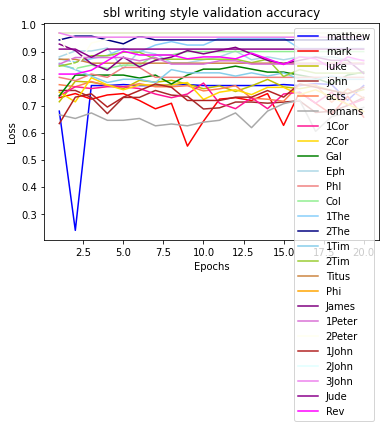

In [44]:
import matplotlib.pyplot as plt

matvac = mat.history['val_accuracy']
makvac = mak.history['val_accuracy']
lukvac = luk.history['val_accuracy']
johvac = joh.history['val_accuracy']
actvac = act.history['val_accuracy']
romvac = rom.history['val_accuracy']
fcrvac = fcr.history['val_accuracy']
scrvac = scr.history['val_accuracy']
gltvac = glt.history['val_accuracy']
eptvac = ept.history['val_accuracy']
plpvac = plp.history['val_accuracy']
clsvac = cls.history['val_accuracy']
ftlvac = ftl.history['val_accuracy']
stlvac = stl.history['val_accuracy']
ftmvac = ftm.history['val_accuracy']
stmvac = stm.history['val_accuracy']
tusvac = tus.history['val_accuracy']
plmvac = plm.history['val_accuracy']
jamvac = jam.history['val_accuracy']
fptvac = fpt.history['val_accuracy']
sptvac = spt.history['val_accuracy']
fjnvac = fjn.history['val_accuracy']
sjnvac = sjn.history['val_accuracy']
tjnvac = tjn.history['val_accuracy']
jdevac = jde.history['val_accuracy']
rvlvac = rvl.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matvac, 'b', label='matthew')
plt.plot(epochs, makvac, 'r', label='mark')
plt.plot(epochs, lukvac, 'y', label='luke')
plt.plot(epochs, johvac, 'brown', label='john')
plt.plot(epochs, actvac, 'coral', label='acts')
plt.plot(epochs, romvac, 'darkgray', label='romans')
plt.plot(epochs, fcrvac, 'deeppink', label='1Cor')
plt.plot(epochs, scrvac, 'gold', label='2Cor')
plt.plot(epochs, gltvac, 'green', label='Gal')
plt.plot(epochs, eptvac, 'lightblue', label='Eph')
plt.plot(epochs, plpvac, 'lightcoral', label='Phl')
plt.plot(epochs, clsvac, 'lightgreen', label='Col')
plt.plot(epochs, ftlvac, 'lightskyblue', label='1The')
plt.plot(epochs, stlvac, 'navy', label='2The')
plt.plot(epochs, ftmvac, 'skyblue', label='1Tim')
plt.plot(epochs, stmvac, 'yellowgreen', label='2Tim')
plt.plot(epochs, tusvac, 'peru', label='Titus')
plt.plot(epochs, plmvac, 'orange', label='Phi')
plt.plot(epochs, jamvac, 'purple', label='James')
plt.plot(epochs, fptvac, 'orchid', label='1Peter')
plt.plot(epochs, sptvac, 'ivory', label='2Peter')
plt.plot(epochs, fjnvac, 'firebrick', label='1John')
plt.plot(epochs, sjnvac, 'lightcyan', label='2John')
plt.plot(epochs, tjnvac, 'violet', label='3John')
plt.plot(epochs, jdevac, 'darkmagenta', label='Jude')
plt.plot(epochs, rvlvac, 'magenta', label='Rev')
plt.title('sbl writing style validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
mat_s1 = cosine_text(Matthew)
mark_s1 = cosine_text(Mark)
luke_s1 = cosine_text(Luke_Book)
jam_s1 = cosine_text(James)
pet_s1 = cosine_text(Peter_letter)
john_s1 = cosine_text(John_Book.dropna())
jude_s1 = cosine_text(Jude)
pl_s1 = cosine_text(Paul_letters)

In [46]:
mat_s11 = text_author(Matthew)
mark_s11 = text_author(Mark)
luke_s11 = text_author(Luke_Book)
jam_s11 = text_author(James)
pet_s11 = text_author(Peter_letter)
john_s11 = text_author(John_Book.dropna())
jude_s11 = text_author(Jude)
pl_s11 = text_author(Paul_letters)

In [47]:
matthewbook = model_output(mat_s1,mat_s11)

Epoch 1/20
35/35 [==============================] - 3s 92ms/step - loss: 2.0222 - accuracy: 0.8084 - val_loss: 1.5021 - val_accuracy: 0.8182
Epoch 2/20
35/35 [==============================] - 2s 50ms/step - loss: 1.3673 - accuracy: 0.8622 - val_loss: 1.5965 - val_accuracy: 0.8218
Epoch 3/20
35/35 [==============================] - 2s 51ms/step - loss: 1.0986 - accuracy: 0.8823 - val_loss: 1.9061 - val_accuracy: 0.8073
Epoch 4/20
35/35 [==============================] - 2s 50ms/step - loss: 1.0193 - accuracy: 0.9051 - val_loss: 1.5312 - val_accuracy: 0.8327
Epoch 5/20
35/35 [==============================] - 2s 51ms/step - loss: 0.8916 - accuracy: 0.9042 - val_loss: 1.6058 - val_accuracy: 0.8073
Epoch 6/20
35/35 [==============================] - 2s 52ms/step - loss: 0.7833 - accuracy: 0.9078 - val_loss: 1.7686 - val_accuracy: 0.7927
Epoch 7/20
35/35 [==============================] - 2s 51ms/step - loss: 0.6147 - accuracy: 0.9243 - val_loss: 1.4850 - val_accuracy: 0.8145
Epoch 8/20
35

In [48]:
markbook = model_output(mark_s1,mark_s11)

Epoch 1/20
25/25 [==============================] - 3s 105ms/step - loss: 1.8986 - accuracy: 0.8167 - val_loss: 1.8119 - val_accuracy: 0.8010
Epoch 2/20
25/25 [==============================] - 1s 50ms/step - loss: 1.8663 - accuracy: 0.8423 - val_loss: 2.3989 - val_accuracy: 0.7806
Epoch 3/20
25/25 [==============================] - 1s 51ms/step - loss: 1.6106 - accuracy: 0.8538 - val_loss: 2.2539 - val_accuracy: 0.8010
Epoch 4/20
25/25 [==============================] - 1s 49ms/step - loss: 1.3987 - accuracy: 0.8821 - val_loss: 2.0599 - val_accuracy: 0.7857
Epoch 5/20
25/25 [==============================] - 1s 50ms/step - loss: 1.2965 - accuracy: 0.8936 - val_loss: 2.2989 - val_accuracy: 0.7959
Epoch 6/20
25/25 [==============================] - 1s 50ms/step - loss: 1.2371 - accuracy: 0.9038 - val_loss: 2.0077 - val_accuracy: 0.8112
Epoch 7/20
25/25 [==============================] - 1s 52ms/step - loss: 1.0944 - accuracy: 0.9077 - val_loss: 2.0518 - val_accuracy: 0.7755
Epoch 8/20
2

In [49]:
lukebook = model_output(luke_s1,luke_s11)

Epoch 1/20
62/62 [==============================] - 5s 76ms/step - loss: 0.7587 - accuracy: 0.9139 - val_loss: 1.2963 - val_accuracy: 0.8635
Epoch 2/20
62/62 [==============================] - 3s 51ms/step - loss: 0.6253 - accuracy: 0.9317 - val_loss: 0.9284 - val_accuracy: 0.8819
Epoch 3/20
62/62 [==============================] - 3s 52ms/step - loss: 0.5690 - accuracy: 0.9435 - val_loss: 1.0081 - val_accuracy: 0.8859
Epoch 4/20
62/62 [==============================] - 3s 54ms/step - loss: 0.4813 - accuracy: 0.9577 - val_loss: 1.0551 - val_accuracy: 0.8880
Epoch 5/20
62/62 [==============================] - 3s 53ms/step - loss: 0.5293 - accuracy: 0.9460 - val_loss: 1.1897 - val_accuracy: 0.8737
Epoch 6/20
62/62 [==============================] - 3s 53ms/step - loss: 0.4299 - accuracy: 0.9633 - val_loss: 1.2295 - val_accuracy: 0.8819
Epoch 7/20
62/62 [==============================] - 3s 54ms/step - loss: 0.3957 - accuracy: 0.9643 - val_loss: 0.8713 - val_accuracy: 0.9022
Epoch 8/20
62

In [50]:
jams = model_output(jam_s1,jam_s11)

Epoch 1/20
11/11 [==============================] - 2s 194ms/step - loss: 1.3776 - accuracy: 0.8537 - val_loss: 1.7273 - val_accuracy: 0.8554
Epoch 2/20
11/11 [==============================] - 1s 55ms/step - loss: 1.0688 - accuracy: 0.9146 - val_loss: 1.7197 - val_accuracy: 0.8675
Epoch 3/20
11/11 [==============================] - 1s 52ms/step - loss: 1.0342 - accuracy: 0.9329 - val_loss: 1.7235 - val_accuracy: 0.8675
Epoch 4/20
11/11 [==============================] - 1s 53ms/step - loss: 1.0288 - accuracy: 0.9329 - val_loss: 1.7253 - val_accuracy: 0.8554
Epoch 5/20
11/11 [==============================] - 1s 52ms/step - loss: 1.0272 - accuracy: 0.9329 - val_loss: 1.7285 - val_accuracy: 0.8554
Epoch 6/20
11/11 [==============================] - 1s 53ms/step - loss: 0.9624 - accuracy: 0.9299 - val_loss: 1.3866 - val_accuracy: 0.8675
Epoch 7/20
11/11 [==============================] - 1s 50ms/step - loss: 0.8579 - accuracy: 0.9390 - val_loss: 1.5355 - val_accuracy: 0.8795
Epoch 8/20
1

In [51]:
peter = model_output(pet_s1,pet_s11)

Epoch 1/20
12/12 [==============================] - 2s 176ms/step - loss: 1.1009 - accuracy: 0.8693 - val_loss: 0.8522 - val_accuracy: 0.9255
Epoch 2/20
12/12 [==============================] - 1s 52ms/step - loss: 0.8532 - accuracy: 0.9093 - val_loss: 0.8457 - val_accuracy: 0.9362
Epoch 3/20
12/12 [==============================] - 1s 52ms/step - loss: 0.7898 - accuracy: 0.9493 - val_loss: 0.8405 - val_accuracy: 0.9362
Epoch 4/20
12/12 [==============================] - 1s 51ms/step - loss: 0.7803 - accuracy: 0.9493 - val_loss: 0.8398 - val_accuracy: 0.9362
Epoch 5/20
12/12 [==============================] - 1s 51ms/step - loss: 0.7767 - accuracy: 0.9493 - val_loss: 0.8458 - val_accuracy: 0.9362
Epoch 6/20
12/12 [==============================] - 1s 52ms/step - loss: 0.7754 - accuracy: 0.9493 - val_loss: 0.8458 - val_accuracy: 0.9362
Epoch 7/20
12/12 [==============================] - 1s 54ms/step - loss: 0.7754 - accuracy: 0.9493 - val_loss: 0.8458 - val_accuracy: 0.9362
Epoch 8/20
1

In [52]:
johnbook = model_output(john_s1,john_s11)

Epoch 1/20
43/43 [==============================] - 4s 87ms/step - loss: 0.6703 - accuracy: 0.9172 - val_loss: 0.6438 - val_accuracy: 0.9327
Epoch 2/20
43/43 [==============================] - 2s 52ms/step - loss: 0.5401 - accuracy: 0.9436 - val_loss: 0.5363 - val_accuracy: 0.9298
Epoch 3/20
43/43 [==============================] - 2s 55ms/step - loss: 0.4137 - accuracy: 0.9568 - val_loss: 0.5600 - val_accuracy: 0.9327
Epoch 4/20
43/43 [==============================] - 2s 57ms/step - loss: 0.3483 - accuracy: 0.9648 - val_loss: 0.4983 - val_accuracy: 0.9444
Epoch 5/20
43/43 [==============================] - 2s 57ms/step - loss: 0.2918 - accuracy: 0.9751 - val_loss: 0.5173 - val_accuracy: 0.9269
Epoch 6/20
43/43 [==============================] - 2s 52ms/step - loss: 0.3036 - accuracy: 0.9707 - val_loss: 0.4684 - val_accuracy: 0.9327
Epoch 7/20
43/43 [==============================] - 2s 54ms/step - loss: 0.3033 - accuracy: 0.9780 - val_loss: 0.5093 - val_accuracy: 0.9474
Epoch 8/20
43

In [53]:
jude = model_output(jude_s1,jude_s11)

Epoch 1/20
9/9 [==============================] - 2s 214ms/step - loss: 0.8030 - accuracy: 0.9313 - val_loss: 0.7581 - val_accuracy: 0.9242
Epoch 2/20
9/9 [==============================] - 0s 50ms/step - loss: 0.6084 - accuracy: 0.9466 - val_loss: 0.7542 - val_accuracy: 0.9242
Epoch 3/20
9/9 [==============================] - 0s 51ms/step - loss: 0.5331 - accuracy: 0.9580 - val_loss: 0.7734 - val_accuracy: 0.9242
Epoch 4/20
9/9 [==============================] - 0s 47ms/step - loss: 0.5245 - accuracy: 0.9656 - val_loss: 0.7734 - val_accuracy: 0.9242
Epoch 5/20
9/9 [==============================] - 0s 51ms/step - loss: 0.5245 - accuracy: 0.9656 - val_loss: 0.7734 - val_accuracy: 0.9242
Epoch 6/20
9/9 [==============================] - 0s 49ms/step - loss: 0.5245 - accuracy: 0.9656 - val_loss: 0.7734 - val_accuracy: 0.9242
Epoch 7/20
9/9 [==============================] - 0s 49ms/step - loss: 0.5245 - accuracy: 0.9656 - val_loss: 0.7734 - val_accuracy: 0.9242
Epoch 8/20
9/9 [==========

In [54]:
paul = model_output(pl_s1,pl_s11)

Epoch 1/20
59/59 [==============================] - 5s 81ms/step - loss: 0.8857 - accuracy: 0.9131 - val_loss: 0.4564 - val_accuracy: 0.9593
Epoch 2/20
59/59 [==============================] - 3s 54ms/step - loss: 0.5505 - accuracy: 0.9464 - val_loss: 0.4683 - val_accuracy: 0.9529
Epoch 3/20
59/59 [==============================] - 3s 53ms/step - loss: 0.3513 - accuracy: 0.9625 - val_loss: 0.6401 - val_accuracy: 0.9272
Epoch 4/20
59/59 [==============================] - 3s 53ms/step - loss: 0.3239 - accuracy: 0.9684 - val_loss: 0.4185 - val_accuracy: 0.9550
Epoch 5/20
59/59 [==============================] - 3s 53ms/step - loss: 0.2798 - accuracy: 0.9737 - val_loss: 0.3804 - val_accuracy: 0.9572
Epoch 6/20
59/59 [==============================] - 3s 54ms/step - loss: 0.2015 - accuracy: 0.9823 - val_loss: 0.4512 - val_accuracy: 0.9422
Epoch 7/20
59/59 [==============================] - 3s 53ms/step - loss: 0.1997 - accuracy: 0.9828 - val_loss: 0.6733 - val_accuracy: 0.9379
Epoch 8/20
59

In [55]:
au_loss = {'Matthew_book':matthewbook.history['loss'],'Mark_book':markbook.history['loss'],'Luke_book':lukebook.history['loss'],'John_book':johnbook.history['loss'],
           'Paul_book':paul.history['loss'],'James_book':jams.history['loss'],'Jude_book':jude.history['loss'],'Peter_book':peter.history['loss']}
SBL_loss = DataFrame(au_loss)

au_val_loss = {'Matthew_book':matthewbook.history['val_loss'],'Mark_book':markbook.history['val_loss'],'Luke_book':lukebook.history['val_loss'],'John_book':johnbook.history['val_loss'],
           'Paul_book':paul.history['val_loss'],'James_book':jams.history['val_loss'],'Jude_book':jude.history['val_loss'],'Peter_book':peter.history['val_loss']}
SBL_val_loss = DataFrame(au_val_loss)

au_accuracy = {'Matthew_book':matthewbook.history['accuracy'],'Mark_book':markbook.history['accuracy'],'Luke_book':lukebook.history['accuracy'],'John_book':johnbook.history['accuracy'],
           'Paul_book':paul.history['accuracy'],'James_book':jams.history['accuracy'],'Jude_book':jude.history['accuracy'],'Peter_book':peter.history['accuracy']}
SBL_accuracy = DataFrame(au_accuracy)

au_val_accuracy = {'Matthew_book':matthewbook.history['val_accuracy'],'Mark_book':markbook.history['val_accuracy'],'Luke_book':lukebook.history['val_accuracy'],'John_book':johnbook.history['val_accuracy'],
           'Paul_book':paul.history['val_accuracy'],'James_book':jams.history['val_accuracy'],'Jude_book':jude.history['val_accuracy'],'Peter_book':peter.history['val_accuracy']}
SBL_val_accuracy = DataFrame(au_val_accuracy)

In [56]:
sbl_loss.to_excel('spacy author SBL LOSS.xlsx',encoding = 'utf-8', index = False)
sbl_accuracy.to_excel('spacy author SBL ACCURACY.xlsx',encoding = 'utf-8', index = False)  
sbl_val_loss.to_excel('spacy author SBL VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
sbl_val_accuracy.to_excel('spacy author SBL VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)  

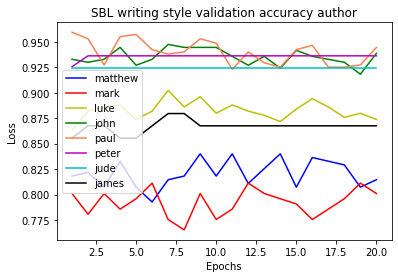

In [57]:
matthewvac = matthewbook.history['val_accuracy']
markvac = markbook.history['val_accuracy']
lukevac = lukebook.history['val_accuracy']
johnvac = johnbook.history['val_accuracy']
paulvac = paul.history['val_accuracy']
petervac = peter.history['val_accuracy']
judevac = jude.history['val_accuracy']
jamesvac = jams.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matthewvac, 'b', label='matthew')
plt.plot(epochs, markvac, 'r', label='mark')
plt.plot(epochs, lukevac, 'y', label='luke')
plt.plot(epochs, johnvac, 'g', label='john')
plt.plot(epochs, paulvac, 'coral', label='paul')
plt.plot(epochs, petervac, 'm', label='peter')
plt.plot(epochs, judevac, 'c', label='jude')
plt.plot(epochs, jamesvac, 'k', label='james')

plt.title('SBL writing style validation accuracy author')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Tyndale_version

In [ ]:
Matthew = df3[df3.BookName == 'Matthew']
Matthew['Author'] = 'Matthew'
Mark = df3[df3.BookName == 'Mark']
Mark['Author'] = 'Mark'
Luke = df3[df3.BookName == 'Luke']
Luke['Author'] = 'Luke'
John = df3[df3.BookName == 'John']
John['Author'] = 'John'
Acts = df3[df3.BookName == 'Acta']
Acts['Author'] = 'Luke'
Luke_Book = pd.concat([Luke,Acts],axis = 0)
James = df3[df3.BookName == 'Jamss']
James['Author'] = 'James'
f_Peter = df3[df3.BookName == '1Peter']
s_Peter = df3[df3.BookName == '2Peter']
f_Peter['Author'] = 'Peter'
s_Peter['Author'] = 'Peter'
Peter_letter = pd.concat([f_Peter, s_Peter], axis = 0)

f_John = df3[df3.BookName == '1John']
s_John = df3[df3.BookName == '2John']
t_John = df3[df3.BookName == '3John']
f_John['Author'] = 'John'
s_John['Author'] = 'John'
t_John['Author'] = 'John'
John_letter = pd.concat([f_John, s_John, t_John], axis = 0)

Jude = df3[df3.BookName == 'Jude']
Jude['Author'] = 'Jude'
Rev = df3[df3.BookName == 'Revelation']
Rev['Author'] = 'John'
John_Book = pd.concat([John,John_letter,Rev],axis = 0)

In [ ]:
Romans = df3[df3.BookName == 'Romans']
Romans['Author'] = 'Paul'
f_cor = df3[df3.BookName == '1Corinthians']
f_cor['Author'] = 'Paul'
s_cor = df3[df3.BookName == '2Corinthians']
s_cor['Author'] = 'Paul'
Gal = df3[df3.BookName == 'Galatians']
Gal['Author'] = 'Paul'
Eph = df3[df3.BookName == 'Ephesians']
Eph['Author'] = 'Paul'
Phi = df3[df3.BookName == 'Philippians']
Phi['Author'] = 'Paul'
Col = df3[df3.BookName == 'Colossians']
Col['Author'] = 'Paul'
f_the = df3[df3.BookName == '1Thessalonians']
f_the['Author'] = 'Paul'
s_the = df3[df3.BookName == '2Thessalonians']
s_the['Author'] = 'Paul'
f_tim = df3[df3.BookName == '1Timothy']
f_tim['Author'] = 'Paul'
s_tim = df3[df3.BookName == '2Timothy']
s_tim['Author'] = 'Paul'
Titus = df3[df3.BookName == 'Titus']
Titus['Author'] = 'Paul'
Philemon = df3[df3.BookName == 'Philemon']
Philemon['Author'] = 'Paul'
Paul_letters = pd.concat([Romans,f_cor,s_cor,Gal,Eph,Phi,Col,f_the,s_the,f_tim,s_tim,Titus,Philemon],axis = 0)
Heb = df3[df3.BookName == 'Hebrews']
Heb['Author'] = 'Paul?'

In [ ]:
g1 = cosine_text(Matthew)
g2 = cosine_text(Mark)
g3 = cosine_text(Luke)
g4 = cosine_text(John)
acts = cosine_text(Acts)
rms = cosine_text(Romans)
fcor = cosine_text(f_cor)
scor = cosine_text(s_cor)
gal = cosine_text(Gal)
eph = cosine_text(Eph)
phi = cosine_text(Phi)
col = cosine_text(Col)
fthe = cosine_text(f_the)
sthe = cosine_text(s_the)
ftim = cosine_text(f_tim)
stim = cosine_text(s_tim)
titus = cosine_text(Titus)
philemon = cosine_text(Philemon)
jams = cosine_text(James)
fpet = cosine_text(f_Peter)
spet = cosine_text(s_Peter)
fjohn = cosine_text(f_John)
sjohn = cosine_text(s_John)
tjohn = cosine_text(t_John.dropna())
jud = cosine_text(Jude)
rev = cosine_text(Rev)

In [ ]:
g11 = text_author(Matthew)
g21 = text_author(Mark)
g31 = text_author(Luke)
g41 = text_author(John)
acts1 = text_author(Acts)
rms1 = text_author(Romans)
fcor1 = text_author(f_cor)
scor1 = text_author(s_cor)
gal1 = text_author(Gal)
eph1 = text_author(Eph)
phi1 = text_author(Phi)
col1 = text_author(Col)
fthe1 = text_author(f_the)
sthe1 = text_author(s_the)
ftim1 = text_author(f_tim)
stim1 = text_author(s_tim)
titus1 = text_author(Titus)
philemon1 = text_author(Philemon)
jams1 = text_author(James)
fpet1 = text_author(f_Peter)
spet1 = text_author(s_Peter)
fjohn1 = text_author(f_John)
sjohn1 = text_author(s_John)
tjohn1 = text_author(t_John.dropna())
jud1 = text_author(Jude)
rev1 = text_author(Rev)

In [ ]:
mat = model_output(g1,g11)

Epoch 1/20
35/35 [==============================] - 3s 91ms/step - loss: 1.0283 - accuracy: 0.7020 - val_loss: 1.2376 - val_accuracy: 0.7500
Epoch 2/20
35/35 [==============================] - 2s 50ms/step - loss: 0.5846 - accuracy: 0.7437 - val_loss: 0.5730 - val_accuracy: 0.7500
Epoch 3/20
35/35 [==============================] - 2s 51ms/step - loss: 0.5815 - accuracy: 0.7645 - val_loss: 0.6228 - val_accuracy: 0.7500
Epoch 4/20
35/35 [==============================] - 2s 49ms/step - loss: 0.5563 - accuracy: 0.7654 - val_loss: 0.5686 - val_accuracy: 0.7500
Epoch 5/20
35/35 [==============================] - 2s 50ms/step - loss: 0.5496 - accuracy: 0.7853 - val_loss: 0.5645 - val_accuracy: 0.7500
Epoch 6/20
35/35 [==============================] - 2s 51ms/step - loss: 0.6044 - accuracy: 0.7862 - val_loss: 0.5629 - val_accuracy: 0.7500
Epoch 7/20
35/35 [==============================] - 2s 50ms/step - loss: 0.5619 - accuracy: 0.7790 - val_loss: 0.6854 - val_accuracy: 0.7500
Epoch 8/20
35

In [ ]:
mak = model_output(g2,g21)

Epoch 1/20
25/25 [==============================] - 3s 104ms/step - loss: 0.6273 - accuracy: 0.6943 - val_loss: 0.6368 - val_accuracy: 0.6802
Epoch 2/20
25/25 [==============================] - 1s 49ms/step - loss: 0.6220 - accuracy: 0.6955 - val_loss: 0.6492 - val_accuracy: 0.6751
Epoch 3/20
25/25 [==============================] - 1s 48ms/step - loss: 0.6057 - accuracy: 0.6917 - val_loss: 0.6347 - val_accuracy: 0.6751
Epoch 4/20
25/25 [==============================] - 1s 50ms/step - loss: 0.6082 - accuracy: 0.6943 - val_loss: 0.6396 - val_accuracy: 0.6802
Epoch 5/20
25/25 [==============================] - 1s 49ms/step - loss: 0.6261 - accuracy: 0.6892 - val_loss: 0.6549 - val_accuracy: 0.6701
Epoch 6/20
25/25 [==============================] - 1s 54ms/step - loss: 0.6108 - accuracy: 0.6917 - val_loss: 0.6346 - val_accuracy: 0.6751
Epoch 7/20
25/25 [==============================] - 1s 51ms/step - loss: 0.5940 - accuracy: 0.6943 - val_loss: 0.6344 - val_accuracy: 0.6751
Epoch 8/20
2

In [ ]:
luk = model_output(g3,g31)

Epoch 1/20
37/37 [==============================] - 3s 87ms/step - loss: 0.5900 - accuracy: 0.7860 - val_loss: 0.5358 - val_accuracy: 0.7740
Epoch 2/20
37/37 [==============================] - 2s 50ms/step - loss: 0.5049 - accuracy: 0.7945 - val_loss: 0.5376 - val_accuracy: 0.7705
Epoch 3/20
37/37 [==============================] - 2s 49ms/step - loss: 0.5015 - accuracy: 0.7962 - val_loss: 0.5374 - val_accuracy: 0.7705
Epoch 4/20
37/37 [==============================] - 2s 49ms/step - loss: 0.5131 - accuracy: 0.7971 - val_loss: 0.5370 - val_accuracy: 0.7705
Epoch 5/20
37/37 [==============================] - 2s 51ms/step - loss: 0.4769 - accuracy: 0.7962 - val_loss: 0.6000 - val_accuracy: 0.7705
Epoch 6/20
37/37 [==============================] - 2s 50ms/step - loss: 0.4934 - accuracy: 0.7979 - val_loss: 0.6191 - val_accuracy: 0.7705
Epoch 7/20
37/37 [==============================] - 2s 54ms/step - loss: 0.5176 - accuracy: 0.7954 - val_loss: 0.5524 - val_accuracy: 0.7637
Epoch 8/20
37

In [ ]:
joh = model_output(g4,g41)

Epoch 1/20
30/30 [==============================] - 3s 110ms/step - loss: 0.6758 - accuracy: 0.7209 - val_loss: 0.6214 - val_accuracy: 0.7468
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.6149 - accuracy: 0.7421 - val_loss: 0.6918 - val_accuracy: 0.7595
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.6099 - accuracy: 0.7484 - val_loss: 0.5478 - val_accuracy: 0.7511
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5918 - accuracy: 0.7484 - val_loss: 0.5897 - val_accuracy: 0.7595
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5706 - accuracy: 0.7463 - val_loss: 0.5879 - val_accuracy: 0.7679
Epoch 6/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5724 - accuracy: 0.7611 - val_loss: 0.7321 - val_accuracy: 0.7595
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - loss: 0.5835 - accuracy: 0.7590 - val_loss: 0.6236 - val_accuracy: 0.7342
Epoch 8/20
3

In [ ]:
act = model_output(acts,acts1)

Epoch 1/20
8/8 [==============================] - 2s 221ms/step - loss: 0.7057 - accuracy: 0.8601 - val_loss: 0.0182 - val_accuracy: 0.9836
Epoch 2/20
8/8 [==============================] - 0s 48ms/step - loss: 7.3932e-04 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Ep

In [ ]:
rom = model_output(rms,rms1)

Epoch 1/20
19/19 [==============================] - 2s 123ms/step - loss: 3.1279 - accuracy: 0.5219 - val_loss: 0.9666 - val_accuracy: 0.6040
Epoch 2/20
19/19 [==============================] - 1s 55ms/step - loss: 0.7323 - accuracy: 0.5892 - val_loss: 0.8339 - val_accuracy: 0.6376
Epoch 3/20
19/19 [==============================] - 1s 47ms/step - loss: 0.8232 - accuracy: 0.6296 - val_loss: 0.9888 - val_accuracy: 0.6443
Epoch 4/20
19/19 [==============================] - 1s 48ms/step - loss: 0.6595 - accuracy: 0.6178 - val_loss: 0.8046 - val_accuracy: 0.6779
Epoch 5/20
19/19 [==============================] - 1s 49ms/step - loss: 0.6419 - accuracy: 0.6667 - val_loss: 0.8105 - val_accuracy: 0.6242
Epoch 6/20
19/19 [==============================] - 1s 49ms/step - loss: 0.6058 - accuracy: 0.6835 - val_loss: 0.9275 - val_accuracy: 0.6443
Epoch 7/20
19/19 [==============================] - 1s 49ms/step - loss: 0.6078 - accuracy: 0.6970 - val_loss: 1.2814 - val_accuracy: 0.6779
Epoch 8/20
1

In [ ]:
fcr = model_output(fcor,fcor1)

Epoch 1/20
19/19 [==============================] - 2s 124ms/step - loss: 1.4500 - accuracy: 0.6795 - val_loss: 1.1002 - val_accuracy: 0.7467
Epoch 2/20
19/19 [==============================] - 1s 49ms/step - loss: 0.9230 - accuracy: 0.7030 - val_loss: 1.0214 - val_accuracy: 0.6667
Epoch 3/20
19/19 [==============================] - 1s 49ms/step - loss: 0.7992 - accuracy: 0.7047 - val_loss: 1.1877 - val_accuracy: 0.7333
Epoch 4/20
19/19 [==============================] - 1s 48ms/step - loss: 0.7721 - accuracy: 0.7148 - val_loss: 1.2866 - val_accuracy: 0.7200
Epoch 5/20
19/19 [==============================] - 1s 49ms/step - loss: 0.8052 - accuracy: 0.7232 - val_loss: 1.6216 - val_accuracy: 0.6400
Epoch 6/20
19/19 [==============================] - 1s 50ms/step - loss: 0.8148 - accuracy: 0.7366 - val_loss: 1.4351 - val_accuracy: 0.6467
Epoch 7/20
19/19 [==============================] - 1s 48ms/step - loss: 0.7772 - accuracy: 0.7617 - val_loss: 1.4925 - val_accuracy: 0.6867
Epoch 8/20
1

In [ ]:
scr = model_output(scor,scor1)

Epoch 1/20
15/15 [==============================] - 3s 178ms/step - loss: 1.7270 - accuracy: 0.6949 - val_loss: 1.8856 - val_accuracy: 0.7257
Epoch 2/20
15/15 [==============================] - 1s 48ms/step - loss: 1.2983 - accuracy: 0.7461 - val_loss: 1.5626 - val_accuracy: 0.6991
Epoch 3/20
15/15 [==============================] - 1s 51ms/step - loss: 1.0332 - accuracy: 0.7706 - val_loss: 1.5368 - val_accuracy: 0.7080
Epoch 4/20
15/15 [==============================] - 1s 47ms/step - loss: 0.9011 - accuracy: 0.7840 - val_loss: 1.7773 - val_accuracy: 0.7080
Epoch 5/20
15/15 [==============================] - 1s 48ms/step - loss: 0.8141 - accuracy: 0.8263 - val_loss: 1.4001 - val_accuracy: 0.7080
Epoch 6/20
15/15 [==============================] - 1s 48ms/step - loss: 0.7124 - accuracy: 0.8597 - val_loss: 1.6447 - val_accuracy: 0.7257
Epoch 7/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6865 - accuracy: 0.8708 - val_loss: 2.5870 - val_accuracy: 0.6283
Epoch 8/20
1

In [ ]:
glt = model_output(gal,gal1)

Epoch 1/20
12/12 [==============================] - 2s 165ms/step - loss: 2.9694 - accuracy: 0.6915 - val_loss: 2.2714 - val_accuracy: 0.7363
Epoch 2/20
12/12 [==============================] - 1s 45ms/step - loss: 2.1601 - accuracy: 0.7383 - val_loss: 2.0107 - val_accuracy: 0.7253
Epoch 3/20
12/12 [==============================] - 1s 48ms/step - loss: 1.7930 - accuracy: 0.7879 - val_loss: 1.8702 - val_accuracy: 0.7253
Epoch 4/20
12/12 [==============================] - 1s 47ms/step - loss: 1.6889 - accuracy: 0.8264 - val_loss: 2.1652 - val_accuracy: 0.7253
Epoch 5/20
12/12 [==============================] - 1s 46ms/step - loss: 2.2598 - accuracy: 0.8017 - val_loss: 2.5969 - val_accuracy: 0.7253
Epoch 6/20
12/12 [==============================] - 1s 49ms/step - loss: 2.1157 - accuracy: 0.7631 - val_loss: 2.9519 - val_accuracy: 0.7143
Epoch 7/20
12/12 [==============================] - 1s 47ms/step - loss: 1.8910 - accuracy: 0.7989 - val_loss: 2.5111 - val_accuracy: 0.7143
Epoch 8/20
1

In [ ]:
ept = model_output(eph,eph1)

Epoch 1/20
12/12 [==============================] - 2s 163ms/step - loss: 2.6803 - accuracy: 0.7112 - val_loss: 2.8916 - val_accuracy: 0.6739
Epoch 2/20
12/12 [==============================] - 1s 46ms/step - loss: 2.1346 - accuracy: 0.7384 - val_loss: 1.8209 - val_accuracy: 0.6957
Epoch 3/20
12/12 [==============================] - 1s 46ms/step - loss: 1.4487 - accuracy: 0.7875 - val_loss: 1.8246 - val_accuracy: 0.7174
Epoch 4/20
12/12 [==============================] - 1s 48ms/step - loss: 1.2730 - accuracy: 0.8256 - val_loss: 1.9876 - val_accuracy: 0.7174
Epoch 5/20
12/12 [==============================] - 1s 54ms/step - loss: 1.1110 - accuracy: 0.8583 - val_loss: 1.4662 - val_accuracy: 0.7283
Epoch 6/20
12/12 [==============================] - 1s 46ms/step - loss: 1.0723 - accuracy: 0.8856 - val_loss: 1.9670 - val_accuracy: 0.7500
Epoch 7/20
12/12 [==============================] - 1s 48ms/step - loss: 1.0365 - accuracy: 0.8965 - val_loss: 2.1426 - val_accuracy: 0.7283
Epoch 8/20
1

In [ ]:
plp = model_output(phi,phi1)

Epoch 1/20
11/11 [==============================] - 2s 173ms/step - loss: 2.5836 - accuracy: 0.7676 - val_loss: 1.8510 - val_accuracy: 0.8171
Epoch 2/20
11/11 [==============================] - 1s 47ms/step - loss: 2.1798 - accuracy: 0.8165 - val_loss: 1.8459 - val_accuracy: 0.8049
Epoch 3/20
11/11 [==============================] - 1s 50ms/step - loss: 2.0640 - accuracy: 0.8318 - val_loss: 1.8294 - val_accuracy: 0.7927
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 1.8485 - accuracy: 0.8349 - val_loss: 2.2116 - val_accuracy: 0.7805
Epoch 5/20
11/11 [==============================] - 1s 46ms/step - loss: 1.6044 - accuracy: 0.8532 - val_loss: 1.4684 - val_accuracy: 0.8537
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 1.3837 - accuracy: 0.8716 - val_loss: 1.4912 - val_accuracy: 0.8293
Epoch 7/20
11/11 [==============================] - 1s 47ms/step - loss: 1.3447 - accuracy: 0.8899 - val_loss: 1.4901 - val_accuracy: 0.8415
Epoch 8/20
1

In [ ]:
cls = model_output(col,col1)

Epoch 1/20
10/10 [==============================] - 2s 186ms/step - loss: 2.4057 - accuracy: 0.7555 - val_loss: 1.9387 - val_accuracy: 0.7875
Epoch 2/20
10/10 [==============================] - 0s 49ms/step - loss: 1.5108 - accuracy: 0.8182 - val_loss: 1.9199 - val_accuracy: 0.7250
Epoch 3/20
10/10 [==============================] - 0s 47ms/step - loss: 1.7255 - accuracy: 0.8056 - val_loss: 2.2087 - val_accuracy: 0.7125
Epoch 4/20
10/10 [==============================] - 1s 52ms/step - loss: 1.6943 - accuracy: 0.8119 - val_loss: 1.8587 - val_accuracy: 0.7250
Epoch 5/20
10/10 [==============================] - 0s 49ms/step - loss: 1.5554 - accuracy: 0.8464 - val_loss: 1.8656 - val_accuracy: 0.7500
Epoch 6/20
10/10 [==============================] - 0s 49ms/step - loss: 1.4150 - accuracy: 0.8621 - val_loss: 1.4693 - val_accuracy: 0.8000
Epoch 7/20
10/10 [==============================] - 0s 47ms/step - loss: 1.3034 - accuracy: 0.8683 - val_loss: 1.5216 - val_accuracy: 0.8000
Epoch 8/20
1

In [ ]:
ftl = model_output(fthe,fthe1)

Epoch 1/20
10/10 [==============================] - 2s 192ms/step - loss: 2.0581 - accuracy: 0.8000 - val_loss: 1.3363 - val_accuracy: 0.8608
Epoch 2/20
10/10 [==============================] - 0s 48ms/step - loss: 1.7043 - accuracy: 0.8603 - val_loss: 1.2379 - val_accuracy: 0.8861
Epoch 3/20
10/10 [==============================] - 0s 44ms/step - loss: 1.5218 - accuracy: 0.8730 - val_loss: 1.3056 - val_accuracy: 0.8861
Epoch 4/20
10/10 [==============================] - 1s 50ms/step - loss: 1.2603 - accuracy: 0.9016 - val_loss: 1.3012 - val_accuracy: 0.8734
Epoch 5/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1123 - accuracy: 0.9206 - val_loss: 1.2498 - val_accuracy: 0.8608
Epoch 6/20
10/10 [==============================] - 0s 49ms/step - loss: 1.0529 - accuracy: 0.9238 - val_loss: 1.4906 - val_accuracy: 0.8354
Epoch 7/20
10/10 [==============================] - 0s 47ms/step - loss: 1.0430 - accuracy: 0.9270 - val_loss: 1.2932 - val_accuracy: 0.8481
Epoch 8/20
1

In [ ]:
stl = model_output(sthe,sthe1)

Epoch 1/20
9/9 [==============================] - 3s 290ms/step - loss: 1.0614 - accuracy: 0.8929 - val_loss: 1.5766 - val_accuracy: 0.8732
Epoch 2/20
9/9 [==============================] - 0s 46ms/step - loss: 0.7964 - accuracy: 0.9357 - val_loss: 1.5691 - val_accuracy: 0.8732
Epoch 3/20
9/9 [==============================] - 0s 48ms/step - loss: 0.7024 - accuracy: 0.9464 - val_loss: 1.8990 - val_accuracy: 0.8028
Epoch 4/20
9/9 [==============================] - 0s 49ms/step - loss: 0.7743 - accuracy: 0.9286 - val_loss: 1.5661 - val_accuracy: 0.8873
Epoch 5/20
9/9 [==============================] - 0s 47ms/step - loss: 0.5582 - accuracy: 0.9607 - val_loss: 1.7652 - val_accuracy: 0.8732
Epoch 6/20
9/9 [==============================] - 0s 46ms/step - loss: 0.5491 - accuracy: 0.9643 - val_loss: 1.7653 - val_accuracy: 0.8732
Epoch 7/20
9/9 [==============================] - 0s 49ms/step - loss: 0.5490 - accuracy: 0.9643 - val_loss: 1.7653 - val_accuracy: 0.8732
Epoch 8/20
9/9 [==========

In [ ]:
ftm = model_output(ftim,ftim1)

Epoch 1/20
11/11 [==============================] - 2s 175ms/step - loss: 1.5307 - accuracy: 0.8418 - val_loss: 3.1217 - val_accuracy: 0.7143
Epoch 2/20
11/11 [==============================] - 1s 47ms/step - loss: 1.2606 - accuracy: 0.8687 - val_loss: 3.2415 - val_accuracy: 0.7262
Epoch 3/20
11/11 [==============================] - 1s 47ms/step - loss: 1.1264 - accuracy: 0.8955 - val_loss: 3.1432 - val_accuracy: 0.6905
Epoch 4/20
11/11 [==============================] - 1s 48ms/step - loss: 1.0709 - accuracy: 0.9045 - val_loss: 2.9347 - val_accuracy: 0.7143
Epoch 5/20
11/11 [==============================] - 1s 47ms/step - loss: 1.0347 - accuracy: 0.9284 - val_loss: 2.6079 - val_accuracy: 0.7024
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 1.1195 - accuracy: 0.9134 - val_loss: 2.8000 - val_accuracy: 0.6905
Epoch 7/20
11/11 [==============================] - 1s 49ms/step - loss: 0.9532 - accuracy: 0.9254 - val_loss: 2.6134 - val_accuracy: 0.7381
Epoch 8/20
1

In [ ]:
stm = model_output(stim,stim1)

Epoch 1/20
10/10 [==============================] - 2s 189ms/step - loss: 2.4521 - accuracy: 0.7806 - val_loss: 2.1111 - val_accuracy: 0.8077
Epoch 2/20
10/10 [==============================] - 1s 51ms/step - loss: 2.1107 - accuracy: 0.8323 - val_loss: 2.0760 - val_accuracy: 0.8205
Epoch 3/20
10/10 [==============================] - 0s 48ms/step - loss: 2.0189 - accuracy: 0.8419 - val_loss: 2.2562 - val_accuracy: 0.8205
Epoch 4/20
10/10 [==============================] - 1s 51ms/step - loss: 1.7282 - accuracy: 0.8710 - val_loss: 1.8969 - val_accuracy: 0.8205
Epoch 5/20
10/10 [==============================] - 0s 48ms/step - loss: 1.7002 - accuracy: 0.8903 - val_loss: 1.9087 - val_accuracy: 0.8205
Epoch 6/20
10/10 [==============================] - 0s 45ms/step - loss: 1.6913 - accuracy: 0.8903 - val_loss: 1.8976 - val_accuracy: 0.8333
Epoch 7/20
10/10 [==============================] - 0s 49ms/step - loss: 1.6905 - accuracy: 0.8903 - val_loss: 2.0885 - val_accuracy: 0.8205
Epoch 8/20
1

In [ ]:
tus = model_output(titus,titus1)

Epoch 1/20
9/9 [==============================] - 2s 216ms/step - loss: 1.8653 - accuracy: 0.8286 - val_loss: 1.4747 - val_accuracy: 0.8169
Epoch 2/20
9/9 [==============================] - 0s 52ms/step - loss: 1.2267 - accuracy: 0.8857 - val_loss: 1.6310 - val_accuracy: 0.8310
Epoch 3/20
9/9 [==============================] - 0s 52ms/step - loss: 1.1296 - accuracy: 0.9179 - val_loss: 1.6225 - val_accuracy: 0.8451
Epoch 4/20
9/9 [==============================] - 0s 50ms/step - loss: 1.0552 - accuracy: 0.9286 - val_loss: 1.6229 - val_accuracy: 0.8592
Epoch 5/20
9/9 [==============================] - 0s 53ms/step - loss: 1.0486 - accuracy: 0.9321 - val_loss: 1.6188 - val_accuracy: 0.8592
Epoch 6/20
9/9 [==============================] - 0s 49ms/step - loss: 1.0472 - accuracy: 0.9321 - val_loss: 1.6160 - val_accuracy: 0.8592
Epoch 7/20
9/9 [==============================] - 0s 53ms/step - loss: 1.0462 - accuracy: 0.9321 - val_loss: 1.6162 - val_accuracy: 0.8451
Epoch 8/20
9/9 [==========

In [ ]:
plm = model_output(philemon,philemon1)

Epoch 1/20
9/9 [==============================] - 2s 202ms/step - loss: 0.4492 - accuracy: 0.9582 - val_loss: 0.7525 - val_accuracy: 0.9242
Epoch 2/20
9/9 [==============================] - 0s 45ms/step - loss: 0.4867 - accuracy: 0.9620 - val_loss: 0.8190 - val_accuracy: 0.9091
Epoch 3/20
9/9 [==============================] - 0s 45ms/step - loss: 0.4738 - accuracy: 0.9658 - val_loss: 0.9761 - val_accuracy: 0.9091
Epoch 4/20
9/9 [==============================] - 0s 45ms/step - loss: 0.4692 - accuracy: 0.9696 - val_loss: 0.9761 - val_accuracy: 0.9091
Epoch 5/20
9/9 [==============================] - 0s 48ms/step - loss: 0.4692 - accuracy: 0.9696 - val_loss: 0.9761 - val_accuracy: 0.9091
Epoch 6/20
9/9 [==============================] - 0s 45ms/step - loss: 0.4692 - accuracy: 0.9696 - val_loss: 0.9761 - val_accuracy: 0.9091
Epoch 7/20
9/9 [==============================] - 0s 50ms/step - loss: 0.4692 - accuracy: 0.9696 - val_loss: 0.9761 - val_accuracy: 0.9091
Epoch 8/20
9/9 [==========

In [ ]:
jam = model_output(jams,jams1)

Epoch 1/20
8/8 [==============================] - 2s 226ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+

In [ ]:
fpt = model_output(fpet,fpet1)

Epoch 1/20
11/11 [==============================] - 2s 173ms/step - loss: 3.3735 - accuracy: 0.7622 - val_loss: 2.3321 - val_accuracy: 0.8049
Epoch 2/20
11/11 [==============================] - 1s 48ms/step - loss: 2.4087 - accuracy: 0.7896 - val_loss: 2.1612 - val_accuracy: 0.8415
Epoch 3/20
11/11 [==============================] - 1s 46ms/step - loss: 1.8042 - accuracy: 0.8384 - val_loss: 1.6318 - val_accuracy: 0.8537
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 1.4816 - accuracy: 0.8659 - val_loss: 1.5066 - val_accuracy: 0.8171
Epoch 5/20
11/11 [==============================] - 1s 50ms/step - loss: 1.3540 - accuracy: 0.8841 - val_loss: 1.5366 - val_accuracy: 0.8049
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 1.3203 - accuracy: 0.8902 - val_loss: 1.5073 - val_accuracy: 0.8293
Epoch 7/20
11/11 [==============================] - 1s 47ms/step - loss: 1.3087 - accuracy: 0.8963 - val_loss: 1.2179 - val_accuracy: 0.8171
Epoch 8/20
1

In [ ]:
spt = model_output(spet,spet1)

Epoch 1/20
10/10 [==============================] - 2s 185ms/step - loss: 1.2697 - accuracy: 0.8664 - val_loss: 2.1304 - val_accuracy: 0.8493
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 0.9437 - accuracy: 0.9144 - val_loss: 2.1257 - val_accuracy: 0.8493
Epoch 3/20
10/10 [==============================] - 0s 45ms/step - loss: 0.8576 - accuracy: 0.9418 - val_loss: 2.1228 - val_accuracy: 0.8493
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 0.8466 - accuracy: 0.9452 - val_loss: 1.9256 - val_accuracy: 0.8630
Epoch 5/20
10/10 [==============================] - 0s 45ms/step - loss: 0.7553 - accuracy: 0.9486 - val_loss: 1.9185 - val_accuracy: 0.8630
Epoch 6/20
10/10 [==============================] - 0s 47ms/step - loss: 0.6211 - accuracy: 0.9349 - val_loss: 1.9358 - val_accuracy: 0.8630
Epoch 7/20
10/10 [==============================] - 0s 47ms/step - loss: 0.5914 - accuracy: 0.9589 - val_loss: 1.7343 - val_accuracy: 0.8630
Epoch 8/20
1

In [ ]:
fjn = model_output(fjohn,fjohn1)

Epoch 1/20
11/11 [==============================] - 2s 179ms/step - loss: 1.2899 - accuracy: 0.8537 - val_loss: 1.8451 - val_accuracy: 0.8293
Epoch 2/20
11/11 [==============================] - 1s 49ms/step - loss: 0.9331 - accuracy: 0.9177 - val_loss: 1.7883 - val_accuracy: 0.8293
Epoch 3/20
11/11 [==============================] - 1s 47ms/step - loss: 0.7312 - accuracy: 0.9299 - val_loss: 2.1226 - val_accuracy: 0.8415
Epoch 4/20
11/11 [==============================] - 1s 49ms/step - loss: 0.6346 - accuracy: 0.9573 - val_loss: 2.1352 - val_accuracy: 0.8293
Epoch 5/20
11/11 [==============================] - 1s 51ms/step - loss: 0.6204 - accuracy: 0.9604 - val_loss: 2.1286 - val_accuracy: 0.8293
Epoch 6/20
11/11 [==============================] - 1s 52ms/step - loss: 0.6124 - accuracy: 0.9604 - val_loss: 2.1333 - val_accuracy: 0.8171
Epoch 7/20
11/11 [==============================] - 1s 52ms/step - loss: 0.6107 - accuracy: 0.9604 - val_loss: 2.1342 - val_accuracy: 0.8171
Epoch 8/20
1

In [ ]:
sjn = model_output(sjohn,sjohn1)

Epoch 1/20
8/8 [==============================] - 2s 226ms/step - loss: 0.6757 - accuracy: 0.9209 - val_loss: 0.4915 - val_accuracy: 0.9688
Epoch 2/20
8/8 [==============================] - 0s 47ms/step - loss: 0.4315 - accuracy: 0.9684 - val_loss: 0.4878 - val_accuracy: 0.9688
Epoch 3/20
8/8 [==============================] - 0s 49ms/step - loss: 0.3127 - accuracy: 0.9723 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 4/20
8/8 [==============================] - 0s 46ms/step - loss: 0.3048 - accuracy: 0.9802 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.3041 - accuracy: 0.9802 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 6/20
8/8 [==============================] - 0s 46ms/step - loss: 0.3041 - accuracy: 0.9802 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 7/20
8/8 [==============================] - 0s 46ms/step - loss: 0.3041 - accuracy: 0.9802 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 8/20
8/8 [==========

In [ ]:
tjn = model_output(tjohn,tjohn1)

Epoch 1/20
8/8 [==============================] - 2s 227ms/step - loss: 0.6346 - accuracy: 0.9490 - val_loss: 0.2596 - val_accuracy: 0.9688
Epoch 2/20
8/8 [==============================] - 0s 50ms/step - loss: 0.5508 - accuracy: 0.9608 - val_loss: 0.2472 - val_accuracy: 0.9844
Epoch 3/20
8/8 [==============================] - 0s 49ms/step - loss: 0.5444 - accuracy: 0.9647 - val_loss: 0.2472 - val_accuracy: 0.9844
Epoch 4/20
8/8 [==============================] - 0s 46ms/step - loss: 0.5444 - accuracy: 0.9647 - val_loss: 0.2472 - val_accuracy: 0.9844
Epoch 5/20
8/8 [==============================] - 0s 49ms/step - loss: 0.5444 - accuracy: 0.9647 - val_loss: 0.2472 - val_accuracy: 0.9844
Epoch 6/20
8/8 [==============================] - 0s 46ms/step - loss: 0.5444 - accuracy: 0.9647 - val_loss: 0.2472 - val_accuracy: 0.9844
Epoch 7/20
8/8 [==============================] - 0s 48ms/step - loss: 0.5444 - accuracy: 0.9647 - val_loss: 0.2472 - val_accuracy: 0.9844
Epoch 8/20
8/8 [==========

In [ ]:
jde = model_output(jud,jud1)

Epoch 1/20
9/9 [==============================] - 2s 206ms/step - loss: 0.7849 - accuracy: 0.9354 - val_loss: 0.5310 - val_accuracy: 0.9545
Epoch 2/20
9/9 [==============================] - 0s 51ms/step - loss: 0.7221 - accuracy: 0.9430 - val_loss: 0.7183 - val_accuracy: 0.9545
Epoch 3/20
9/9 [==============================] - 0s 46ms/step - loss: 0.6479 - accuracy: 0.9582 - val_loss: 0.5435 - val_accuracy: 0.9545
Epoch 4/20
9/9 [==============================] - 0s 49ms/step - loss: 0.6445 - accuracy: 0.9582 - val_loss: 0.5435 - val_accuracy: 0.9545
Epoch 5/20
9/9 [==============================] - 0s 47ms/step - loss: 0.6445 - accuracy: 0.9582 - val_loss: 0.5435 - val_accuracy: 0.9545
Epoch 6/20
9/9 [==============================] - 0s 48ms/step - loss: 0.6445 - accuracy: 0.9582 - val_loss: 0.5435 - val_accuracy: 0.9545
Epoch 7/20
9/9 [==============================] - 0s 45ms/step - loss: 0.6445 - accuracy: 0.9582 - val_loss: 0.5435 - val_accuracy: 0.9545
Epoch 8/20
9/9 [==========

In [ ]:
rvl = model_output(rev,rev1)

Epoch 1/20
18/18 [==============================] - 2s 130ms/step - loss: 3.6735 - accuracy: 0.6678 - val_loss: 3.6474 - val_accuracy: 0.6014
Epoch 2/20
18/18 [==============================] - 1s 53ms/step - loss: 3.1469 - accuracy: 0.7241 - val_loss: 4.2475 - val_accuracy: 0.6084
Epoch 3/20
18/18 [==============================] - 1s 52ms/step - loss: 2.8790 - accuracy: 0.7311 - val_loss: 4.4188 - val_accuracy: 0.5874
Epoch 4/20
18/18 [==============================] - 1s 53ms/step - loss: 2.7397 - accuracy: 0.7241 - val_loss: 4.4127 - val_accuracy: 0.5594
Epoch 5/20
18/18 [==============================] - 1s 53ms/step - loss: 2.3980 - accuracy: 0.7540 - val_loss: 4.5279 - val_accuracy: 0.5524
Epoch 6/20
18/18 [==============================] - 1s 51ms/step - loss: 2.1300 - accuracy: 0.7821 - val_loss: 4.3874 - val_accuracy: 0.6014
Epoch 7/20
18/18 [==============================] - 1s 51ms/step - loss: 1.9305 - accuracy: 0.7856 - val_loss: 4.7124 - val_accuracy: 0.5734
Epoch 8/20
1

In [ ]:
from pandas.core.frame import DataFrame
df_loss = {'Matthew':mat.history['loss'],'Mark':mak.history['loss'],'Luke':luk.history['loss'],'John':joh.history['loss'],
           'Acts':act.history['loss'],'Romans':rom.history['loss'],'1Cor':fcr.history['loss'],'2Cor':scr.history['loss'],'Gal':glt.history['loss'],
           'Eph':ept.history['loss'],'Phl':plp.history['loss'],'Col':cls.history['loss'],'1The':ftl.history['loss'],'2The':stl.history['loss'],
           '1Tim':ftm.history['loss'],'2Tim':stm.history['loss'],'Titus':tus.history['loss'],'Phi':plm.history['loss'],'James':jam.history['loss'],
           '1Peter':fpt.history['loss'],'2Peter':spt.history['loss'],'1John':fjn.history['loss'],'2John':sjn.history['loss'],'3John':tjn.history['loss'],
           'Jude':jde.history['loss'],'Rev':rvl.history['loss']}
tyn_loss = DataFrame(df_loss)

df_val_loss = {'Matthew':mat.history['val_loss'],'Mark':mak.history['val_loss'],'Luke':luk.history['val_loss'],'John':joh.history['val_loss'],
           'Acts':act.history['val_loss'],'Romans':rom.history['val_loss'],'1Cor':fcr.history['val_loss'],'2Cor':scr.history['val_loss'],'Gal':glt.history['val_loss'],
           'Eph':ept.history['val_loss'],'Phl':plp.history['val_loss'],'Col':cls.history['val_loss'],'1The':ftl.history['val_loss'],'2The':stl.history['val_loss'],
           '1Tim':ftm.history['val_loss'],'2Tim':stm.history['val_loss'],'Titus':tus.history['val_loss'],'Phi':plm.history['val_loss'],'James':jam.history['val_loss'],
           '1Peter':fpt.history['val_loss'],'2Peter':spt.history['val_loss'],'1John':fjn.history['val_loss'],'2John':sjn.history['val_loss'],'3John':tjn.history['val_loss'],
           'Jude':jde.history['val_loss'],'Rev':rvl.history['val_loss']}
tyn_val_loss = DataFrame(df_val_loss)

df_accuracy = {'Matthew':mat.history['accuracy'],'Mark':mak.history['accuracy'],'Luke':luk.history['accuracy'],'John':joh.history['accuracy'],
           'Acts':act.history['accuracy'],'Romans':rom.history['accuracy'],'1Cor':fcr.history['accuracy'],'2Cor':scr.history['accuracy'],'Gal':glt.history['accuracy'],
           'Eph':ept.history['accuracy'],'Phl':plp.history['accuracy'],'Col':cls.history['accuracy'],'1The':ftl.history['accuracy'],'2The':stl.history['accuracy'],
           '1Tim':ftm.history['accuracy'],'2Tim':stm.history['accuracy'],'Titus':tus.history['accuracy'],'Phi':plm.history['accuracy'],'James':jam.history['accuracy'],
           '1Peter':fpt.history['accuracy'],'2Peter':spt.history['accuracy'],'1John':fjn.history['accuracy'],'2John':sjn.history['accuracy'],'3John':tjn.history['accuracy'],
           'Jude':jde.history['accuracy'],'Rev':rvl.history['accuracy']}
tyn_accuracy = DataFrame(df_accuracy)

df_val_accuracy = {'Matthew':mat.history['val_accuracy'],'Mark':mak.history['val_accuracy'],'Luke':luk.history['val_accuracy'],'John':joh.history['val_accuracy'],
           'Acts':act.history['val_accuracy'],'Romans':rom.history['val_accuracy'],'1Cor':fcr.history['val_accuracy'],'2Cor':scr.history['val_accuracy'],'Gal':glt.history['val_accuracy'],
           'Eph':ept.history['val_accuracy'],'Phl':plp.history['val_accuracy'],'Col':cls.history['val_accuracy'],'1The':ftl.history['val_accuracy'],'2The':stl.history['val_accuracy'],
           '1Tim':ftm.history['val_accuracy'],'2Tim':stm.history['val_accuracy'],'Titus':tus.history['val_accuracy'],'Phi':plm.history['val_accuracy'],'James':jam.history['val_accuracy'],
           '1Peter':fpt.history['val_accuracy'],'2Peter':spt.history['val_accuracy'],'1John':fjn.history['val_accuracy'],'2John':sjn.history['val_accuracy'],'3John':tjn.history['val_accuracy'],
           'Jude':jde.history['val_accuracy'],'Rev':rvl.history['val_accuracy']}
tyn_val_accuracy = DataFrame(df_val_accuracy)

In [ ]:
tyn_loss.to_excel('spacy Tyndale LOSS.xlsx',encoding = 'utf-8', index = False)
tyn_accuracy.to_excel('spacy Tyndale ACCURACY.xlsx',encoding = 'utf-8', index = False)  
tyn_val_loss.to_excel('spacy Tyndale VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
tyn_val_accuracy.to_excel('spacy Tyndale VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False) 

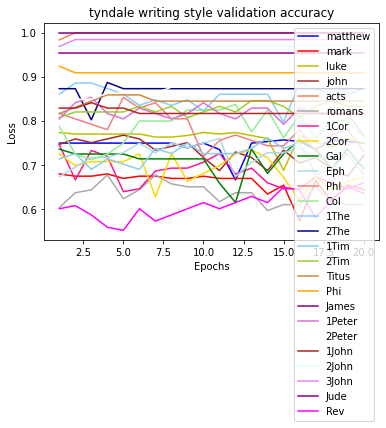

In [ ]:
import matplotlib.pyplot as plt

matvac = mat.history['val_accuracy']
makvac = mak.history['val_accuracy']
lukvac = luk.history['val_accuracy']
johvac = joh.history['val_accuracy']
actvac = act.history['val_accuracy']
romvac = rom.history['val_accuracy']
fcrvac = fcr.history['val_accuracy']
scrvac = scr.history['val_accuracy']
gltvac = glt.history['val_accuracy']
eptvac = ept.history['val_accuracy']
plpvac = plp.history['val_accuracy']
clsvac = cls.history['val_accuracy']
ftlvac = ftl.history['val_accuracy']
stlvac = stl.history['val_accuracy']
ftmvac = ftm.history['val_accuracy']
stmvac = stm.history['val_accuracy']
tusvac = tus.history['val_accuracy']
plmvac = plm.history['val_accuracy']
jamvac = jam.history['val_accuracy']
fptvac = fpt.history['val_accuracy']
sptvac = spt.history['val_accuracy']
fjnvac = fjn.history['val_accuracy']
sjnvac = sjn.history['val_accuracy']
tjnvac = tjn.history['val_accuracy']
jdevac = jde.history['val_accuracy']
rvlvac = rvl.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matvac, 'b', label='matthew')
plt.plot(epochs, makvac, 'r', label='mark')
plt.plot(epochs, lukvac, 'y', label='luke')
plt.plot(epochs, johvac, 'brown', label='john')
plt.plot(epochs, actvac, 'coral', label='acts')
plt.plot(epochs, romvac, 'darkgray', label='romans')
plt.plot(epochs, fcrvac, 'deeppink', label='1Cor')
plt.plot(epochs, scrvac, 'gold', label='2Cor')
plt.plot(epochs, gltvac, 'green', label='Gal')
plt.plot(epochs, eptvac, 'lightblue', label='Eph')
plt.plot(epochs, plpvac, 'lightcoral', label='Phl')
plt.plot(epochs, clsvac, 'lightgreen', label='Col')
plt.plot(epochs, ftlvac, 'lightskyblue', label='1The')
plt.plot(epochs, stlvac, 'navy', label='2The')
plt.plot(epochs, ftmvac, 'skyblue', label='1Tim')
plt.plot(epochs, stmvac, 'yellowgreen', label='2Tim')
plt.plot(epochs, tusvac, 'peru', label='Titus')
plt.plot(epochs, plmvac, 'orange', label='Phi')
plt.plot(epochs, jamvac, 'purple', label='James')
plt.plot(epochs, fptvac, 'orchid', label='1Peter')
plt.plot(epochs, sptvac, 'ivory', label='2Peter')
plt.plot(epochs, fjnvac, 'firebrick', label='1John')
plt.plot(epochs, sjnvac, 'lightcyan', label='2John')
plt.plot(epochs, tjnvac, 'violet', label='3John')
plt.plot(epochs, jdevac, 'darkmagenta', label='Jude')
plt.plot(epochs, rvlvac, 'magenta', label='Rev')
plt.title('tyndale writing style validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
mat_s1 = cosine_text(Matthew)
mark_s1 = cosine_text(Mark)
luke_s1 = cosine_text(Luke_Book)
jam_s1 = cosine_text(James)
pet_s1 = cosine_text(Peter_letter)
john_s1 = cosine_text(John_Book.dropna())
jude_s1 = cosine_text(Jude)
pl_s1 = cosine_text(Paul_letters)

In [ ]:
mat_s11 = text_author(Matthew)
mark_s11 = text_author(Mark)
luke_s11 = text_author(Luke_Book)
jam_s11 = text_author(James)
pet_s11 = text_author(Peter_letter)
john_s11 = text_author(John_Book.dropna())
jude_s11 = text_author(Jude)
pl_s11 = text_author(Paul_letters)

In [ ]:
matthewbook = model_output(mat_s1,mat_s11)

Epoch 1/20
35/35 [==============================] - 3s 93ms/step - loss: 2.8803 - accuracy: 0.6975 - val_loss: 2.0307 - val_accuracy: 0.7645
Epoch 2/20
35/35 [==============================] - 2s 51ms/step - loss: 1.9711 - accuracy: 0.7880 - val_loss: 2.1008 - val_accuracy: 0.7681
Epoch 3/20
35/35 [==============================] - 2s 51ms/step - loss: 1.8253 - accuracy: 0.8062 - val_loss: 2.0139 - val_accuracy: 0.7645
Epoch 4/20
35/35 [==============================] - 2s 52ms/step - loss: 1.5059 - accuracy: 0.8252 - val_loss: 2.4443 - val_accuracy: 0.7645
Epoch 5/20
35/35 [==============================] - 2s 51ms/step - loss: 1.3695 - accuracy: 0.8514 - val_loss: 2.1936 - val_accuracy: 0.7790
Epoch 6/20
35/35 [==============================] - 2s 51ms/step - loss: 1.1927 - accuracy: 0.8705 - val_loss: 1.8976 - val_accuracy: 0.7754
Epoch 7/20
35/35 [==============================] - 2s 54ms/step - loss: 1.1420 - accuracy: 0.9022 - val_loss: 1.5734 - val_accuracy: 0.7717
Epoch 8/20
35

In [ ]:
markbook = model_output(mark_s1,mark_s11)

Epoch 1/20
25/25 [==============================] - 3s 108ms/step - loss: 2.7175 - accuracy: 0.7350 - val_loss: 2.9551 - val_accuracy: 0.7310
Epoch 2/20
25/25 [==============================] - 1s 51ms/step - loss: 2.2971 - accuracy: 0.7834 - val_loss: 2.9431 - val_accuracy: 0.7208
Epoch 3/20
25/25 [==============================] - 1s 50ms/step - loss: 2.0679 - accuracy: 0.7885 - val_loss: 2.9799 - val_accuracy: 0.7360
Epoch 4/20
25/25 [==============================] - 1s 50ms/step - loss: 1.9821 - accuracy: 0.8242 - val_loss: 2.8285 - val_accuracy: 0.7259
Epoch 5/20
25/25 [==============================] - 1s 50ms/step - loss: 1.8142 - accuracy: 0.8331 - val_loss: 2.8323 - val_accuracy: 0.7310
Epoch 6/20
25/25 [==============================] - 1s 51ms/step - loss: 1.7291 - accuracy: 0.8459 - val_loss: 2.7854 - val_accuracy: 0.7259
Epoch 7/20
25/25 [==============================] - 1s 48ms/step - loss: 1.6179 - accuracy: 0.8535 - val_loss: 3.0353 - val_accuracy: 0.6650
Epoch 8/20
2

In [ ]:
lukebook = model_output(luke_s1,luke_s11)

Epoch 1/20
37/37 [==============================] - 5s 128ms/step - loss: 2.2029 - accuracy: 0.7774 - val_loss: 2.0602 - val_accuracy: 0.8048
Epoch 2/20
37/37 [==============================] - 2s 51ms/step - loss: 1.9405 - accuracy: 0.8339 - val_loss: 2.1580 - val_accuracy: 0.8014
Epoch 3/20
37/37 [==============================] - 2s 51ms/step - loss: 1.8322 - accuracy: 0.8373 - val_loss: 1.9166 - val_accuracy: 0.8116
Epoch 4/20
37/37 [==============================] - 2s 51ms/step - loss: 1.7639 - accuracy: 0.8142 - val_loss: 2.0173 - val_accuracy: 0.7979
Epoch 5/20
37/37 [==============================] - 2s 52ms/step - loss: 1.4127 - accuracy: 0.8493 - val_loss: 1.8831 - val_accuracy: 0.8082
Epoch 6/20
37/37 [==============================] - 2s 52ms/step - loss: 1.3096 - accuracy: 0.8801 - val_loss: 1.6951 - val_accuracy: 0.8151
Epoch 7/20
37/37 [==============================] - 2s 53ms/step - loss: 1.2178 - accuracy: 0.8878 - val_loss: 1.6318 - val_accuracy: 0.8356
Epoch 8/20
3

In [ ]:
jams = model_output(jam_s1,jam_s11)

Epoch 1/20
8/8 [==============================] - 2s 226ms/step - loss: 1.6055 - accuracy: 0.8519 - val_loss: 0.5334 - val_accuracy: 0.9508
Epoch 2/20
8/8 [==============================] - 0s 46ms/step - loss: 0.5900 - accuracy: 0.9424 - val_loss: 0.3049 - val_accuracy: 0.9508
Epoch 3/20
8/8 [==============================] - 0s 50ms/step - loss: 0.5648 - accuracy: 0.9630 - val_loss: 0.3049 - val_accuracy: 0.9508
Epoch 4/20
8/8 [==============================] - 0s 50ms/step - loss: 0.5648 - accuracy: 0.9630 - val_loss: 0.3049 - val_accuracy: 0.9508
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.5648 - accuracy: 0.9630 - val_loss: 0.3049 - val_accuracy: 0.9508
Epoch 6/20
8/8 [==============================] - 0s 52ms/step - loss: 0.5648 - accuracy: 0.9630 - val_loss: 0.3049 - val_accuracy: 0.9508
Epoch 7/20
8/8 [==============================] - 0s 47ms/step - loss: 0.5648 - accuracy: 0.9630 - val_loss: 0.3049 - val_accuracy: 0.9508
Epoch 8/20
8/8 [==========

In [ ]:
peter = model_output(pet_s1,pet_s11)

Epoch 1/20
12/12 [==============================] - 2s 173ms/step - loss: 2.2090 - accuracy: 0.7793 - val_loss: 1.8382 - val_accuracy: 0.8632
Epoch 2/20
12/12 [==============================] - 1s 51ms/step - loss: 1.6907 - accuracy: 0.8537 - val_loss: 1.4431 - val_accuracy: 0.8105
Epoch 3/20
12/12 [==============================] - 1s 49ms/step - loss: 1.5300 - accuracy: 0.8457 - val_loss: 1.0431 - val_accuracy: 0.8211
Epoch 4/20
12/12 [==============================] - 1s 49ms/step - loss: 1.3582 - accuracy: 0.8936 - val_loss: 1.1428 - val_accuracy: 0.8421
Epoch 5/20
12/12 [==============================] - 1s 49ms/step - loss: 1.2743 - accuracy: 0.9043 - val_loss: 1.4295 - val_accuracy: 0.8316
Epoch 6/20
12/12 [==============================] - 1s 50ms/step - loss: 1.1510 - accuracy: 0.9096 - val_loss: 1.1663 - val_accuracy: 0.8316
Epoch 7/20
12/12 [==============================] - 1s 50ms/step - loss: 1.0478 - accuracy: 0.9255 - val_loss: 1.7561 - val_accuracy: 0.8316
Epoch 8/20
1

In [ ]:
johnbook = model_output(john_s1,john_s11)

Epoch 1/20
44/44 [==============================] - 4s 84ms/step - loss: 1.5948 - accuracy: 0.8138 - val_loss: 1.6423 - val_accuracy: 0.8377
Epoch 2/20
44/44 [==============================] - 2s 51ms/step - loss: 1.2288 - accuracy: 0.8674 - val_loss: 1.6547 - val_accuracy: 0.8464
Epoch 3/20
44/44 [==============================] - 2s 51ms/step - loss: 1.1248 - accuracy: 0.8783 - val_loss: 1.6091 - val_accuracy: 0.8203
Epoch 4/20
44/44 [==============================] - 2s 51ms/step - loss: 0.9766 - accuracy: 0.8993 - val_loss: 1.4839 - val_accuracy: 0.8493
Epoch 5/20
44/44 [==============================] - 2s 51ms/step - loss: 0.8951 - accuracy: 0.8993 - val_loss: 1.6271 - val_accuracy: 0.8435
Epoch 6/20
44/44 [==============================] - 2s 50ms/step - loss: 0.7860 - accuracy: 0.9087 - val_loss: 1.4917 - val_accuracy: 0.8145
Epoch 7/20
44/44 [==============================] - 2s 52ms/step - loss: 0.6633 - accuracy: 0.9333 - val_loss: 1.4111 - val_accuracy: 0.8319
Epoch 8/20
44

In [ ]:
jude = model_output(jude_s1,jude_s11)

Epoch 1/20
9/9 [==============================] - 2s 214ms/step - loss: 2.1323 - accuracy: 0.7909 - val_loss: 2.4050 - val_accuracy: 0.7879
Epoch 2/20
9/9 [==============================] - 0s 51ms/step - loss: 1.8110 - accuracy: 0.8821 - val_loss: 2.4024 - val_accuracy: 0.7879
Epoch 3/20
9/9 [==============================] - 0s 47ms/step - loss: 1.8049 - accuracy: 0.8821 - val_loss: 2.4070 - val_accuracy: 0.7879
Epoch 4/20
9/9 [==============================] - 0s 48ms/step - loss: 1.7551 - accuracy: 0.8821 - val_loss: 2.1987 - val_accuracy: 0.8182
Epoch 5/20
9/9 [==============================] - 0s 50ms/step - loss: 1.6570 - accuracy: 0.8821 - val_loss: 2.4159 - val_accuracy: 0.8182
Epoch 6/20
9/9 [==============================] - 0s 48ms/step - loss: 1.2329 - accuracy: 0.8973 - val_loss: 2.1947 - val_accuracy: 0.8333
Epoch 7/20
9/9 [==============================] - 0s 47ms/step - loss: 1.0091 - accuracy: 0.9240 - val_loss: 2.1755 - val_accuracy: 0.8485
Epoch 8/20
9/9 [==========

In [ ]:
paul = model_output(pl_s1,pl_s11)

Epoch 1/20
59/59 [==============================] - 5s 78ms/step - loss: 1.1208 - accuracy: 0.8800 - val_loss: 0.9162 - val_accuracy: 0.9110
Epoch 2/20
59/59 [==============================] - 3s 52ms/step - loss: 0.6893 - accuracy: 0.9193 - val_loss: 0.9386 - val_accuracy: 0.8983
Epoch 3/20
59/59 [==============================] - 3s 54ms/step - loss: 0.6316 - accuracy: 0.9321 - val_loss: 0.8110 - val_accuracy: 0.8941
Epoch 4/20
59/59 [==============================] - 3s 54ms/step - loss: 0.4885 - accuracy: 0.9528 - val_loss: 1.1377 - val_accuracy: 0.8941
Epoch 5/20
59/59 [==============================] - 3s 54ms/step - loss: 0.4846 - accuracy: 0.9554 - val_loss: 0.9209 - val_accuracy: 0.9068
Epoch 6/20
59/59 [==============================] - 3s 53ms/step - loss: 0.4452 - accuracy: 0.9644 - val_loss: 0.8306 - val_accuracy: 0.8898
Epoch 7/20
59/59 [==============================] - 3s 52ms/step - loss: 0.4075 - accuracy: 0.9692 - val_loss: 0.8884 - val_accuracy: 0.8919
Epoch 8/20
59

In [ ]:
au_loss = {'Matthew_book':matthewbook.history['loss'],'Mark_book':markbook.history['loss'],'Luke_book':lukebook.history['loss'],'John_book':johnbook.history['loss'],
           'Paul_book':paul.history['loss'],'James_book':jams.history['loss'],'Jude_book':jude.history['loss'],'Peter_book':peter.history['loss']}
tyndale_loss = DataFrame(au_loss)

au_val_loss = {'Matthew_book':matthewbook.history['val_loss'],'Mark_book':markbook.history['val_loss'],'Luke_book':lukebook.history['val_loss'],'John_book':johnbook.history['val_loss'],
           'Paul_book':paul.history['val_loss'],'James_book':jams.history['val_loss'],'Jude_book':jude.history['val_loss'],'Peter_book':peter.history['val_loss']}
tyndale_val_loss = DataFrame(au_val_loss)

au_accuracy = {'Matthew_book':matthewbook.history['accuracy'],'Mark_book':markbook.history['accuracy'],'Luke_book':lukebook.history['accuracy'],'John_book':johnbook.history['accuracy'],
           'Paul_book':paul.history['accuracy'],'James_book':jams.history['accuracy'],'Jude_book':jude.history['accuracy'],'Peter_book':peter.history['accuracy']}
tyndale_accuracy = DataFrame(au_accuracy)

au_val_accuracy = {'Matthew_book':matthewbook.history['val_accuracy'],'Mark_book':markbook.history['val_accuracy'],'Luke_book':lukebook.history['val_accuracy'],'John_book':johnbook.history['val_accuracy'],
           'Paul_book':paul.history['val_accuracy'],'James_book':jams.history['val_accuracy'],'Jude_book':jude.history['val_accuracy'],'Peter_book':peter.history['val_accuracy']}
tyndale_val_accuracy = DataFrame(au_val_accuracy)

In [ ]:
tyndale_loss.to_excel('spacy author tyndale LOSS.xlsx',encoding = 'utf-8', index = False)
tyndale_accuracy.to_excel('spacy author tyndale ACCURACY.xlsx',encoding = 'utf-8', index = False)  
tyndale_val_loss.to_excel('spacy author tyndale VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
tyndale_val_accuracy.to_excel('spacy author tyndale VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)  

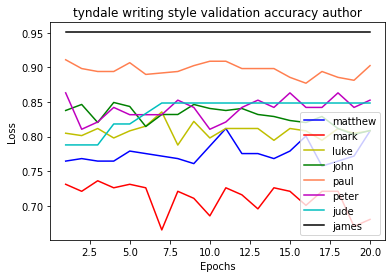

In [ ]:
matthewvac = matthewbook.history['val_accuracy']
markvac = markbook.history['val_accuracy']
lukevac = lukebook.history['val_accuracy']
johnvac = johnbook.history['val_accuracy']
paulvac = paul.history['val_accuracy']
petervac = peter.history['val_accuracy']
judevac = jude.history['val_accuracy']
jamesvac = jams.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matthewvac, 'b', label='matthew')
plt.plot(epochs, markvac, 'r', label='mark')
plt.plot(epochs, lukevac, 'y', label='luke')
plt.plot(epochs, johnvac, 'g', label='john')
plt.plot(epochs, paulvac, 'coral', label='paul')
plt.plot(epochs, petervac, 'm', label='peter')
plt.plot(epochs, judevac, 'c', label='jude')
plt.plot(epochs, jamesvac, 'k', label='james')

plt.title('tyndale writing style validation accuracy author')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()